# <center> **Leveraging Machine Learning to Forecast Customer Lifetime Value (CLV) in Auto Insurance Company**</center>

This final project for Purwadhika Digital Technology Schools illustrates the transformative impact of machine learning on predicting Customer Lifetime Value (CLV) within the auto insurance industry. Discover how these advanced models can enhance customer segmentation and inform more strategic business decisions.

Data source for this project [Vehicle Insurance Customer Data](https://www.kaggle.com/datasets/ranja7/vehicle-insurance-customer-data).

<div style="text-align: center;">
    Created by:

    - Annisa Ditasila
    - Qemhal Haritskhayru
    - Randy Prawiro
</div>

____

# **1. Business Understanding**

**Background:**

In the auto insurance industry, effective management of Customer Lifetime Value (CLV) is crucial for sustaining competitive advantage and maximizing profitability. Frederick Reichheld's research at Bain & Company reveals that improving customer retention by just 5% can lead to profit increases ranging from 25% to 95%. This statistic underscores the importance of fostering long-term customer relationships and implementing targeted retention strategies.

Machine learning offers a powerful tool for predicting CLV by analyzing historical data to identify patterns and trends. In this final project, we apply machine learning techniques to forecast CLV in the auto insurance sector.

**Problem Statement:**

1. Which customers are most valuable?
2. What characteristics define top customers, and how can the company enhance their engagement?
3. How can company makes best allocate resources to maximize the CLV of our most promising customers?

**ML Goals:**

The primary goal of this machine learning project is to predict the Customer Lifetime Value (CLV) for midmarket customers of an auto insurance company. CLV prediction will enable the company to anticipate the future value associated with each customer, aiding in strategic decision-making and resource allocation to hopefully enhance the midmarket customer to give more value to the company in the future.


**Business Goals:**

The overarching business goal is to improve customer retention and increase the retention rate. By accurately predicting CLV, the company aims to identify and retain midmarket and high-value customers more effectively. This approach is expected to lead to higher profitability through increased customer loyalty and reduced churn.


**Key Strategies:**

1. **Focus on Midmarket Customers:** Implement strategies to understand and cater to the needs of midmarket customers, leveraging insights from CLV predictions to tailor personalized experiences and services.
   
2. **Focus on High-Value Customers:** Devote resources towards enhancing the satisfaction and engagement of high-value customers identified through CLV predictions. This involves offering premium services, proactive support, and personalized offers to maximize their long-term value to the company.

**Actionable Insights:**

1. **Customer Segmentation with RFM Analysis**: Utilize RFM (Recency, Frequency, Monetary) analysis to identify and prioritize high-value customer segments.

2. **Resource Allocation for Key Customers**: Provide high-value and strategically important customers with tailored resources and personalized support. This targeted approach ensures that these customers receive the attention they need to enhance their experience and increase their lifetime value.

3. **Retention Strategies for Future Growth**: Implement strategies to retain and nurture customers identified as having high future earning potential.


For further insights on the importance of customer retention, this article delves into the strategic advantages of prioritizing customer retention over acquisition, emphasizing its role in sustainable revenue growth and operational stability.
- [Customer Retention Versus Customer Acquisition](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/)
- [Why Customer Lifetime Value is Important for Your Business](https://piwik.pro/blog/customer-lifetime-value-important-for-your-business/)
- [The Value of Keeping the Right Customers](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)


| Column Name                  | Data Type    | Description                                                    |
|------------------------------|--------------|----------------------------------------------------------------|
| Customer                     | object       | Unique identifier for each customer.                           |
| State                        | object       | State where the customer resides.                              |
| Customer Lifetime Value      | float64      | Predicted total lifetime monetary value of the customer.       |
| Response                     | object       | Whether the customer responded to marketing outreach.          |
| Coverage                     | object       | Type of coverage the customer has (e.g., basic, extended, premium). |
| Education                    | object       | Highest level of education attained by the customer.           |
| Effective To Date            | object       | Date when the policy or contract became not effective.         |
| EmploymentStatus             | object       | Current employment status of the customer.                     |
| Gender                       | object       | Gender of the customer.                                        |
| Income                       | int64        | Annual income of the customer.                                 |
| Location Code                | object       | Type of location where the customer lives (e.g., suburban, rural, urban). |
| Marital Status               | object       | Marital status of the customer.                                |
| Monthly Premium Auto         | int64        | Amount paid by the customer for auto insurance premiums on a monthly basis. |
| Months Since Last Claim      | int64        | Number of months since the customer last filed a claim.        |
| Months Since Policy Inception| int64        | Number of months since the inception of the customer's policy. |
| Number of Open Complaints    | int64        | Number of open complaints at the time of data collection.      |
| Number of Policies           | int64        | Number of insurance policies held by the customer.             |
| Policy Type                  | object       | Type of insurance policy (e.g., corporate auto, personal auto).|
| Policy                       | object       | Specific policy subtype within each policy type.               |
| Renew Offer Type             | object       | Type of renewal offer made to the customer.                    |
| Sales Channel                | object       | Channel through which the insurance policy was sold (e.g., agent, web). |
| Total Claim Amount           | float64      | Total amount claimed by the customer.                          |
| Vehicle Class                | object       | Class of vehicle insured (e.g., two-door car, SUV).            |
| Vehicle Size                 | object       | Size of the vehicle insured (e.g., medsize, small, large).     |


----

# **2. Data Understanding**

## **2.1 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

RANDOM_STATE = 2024
import warnings
warnings.filterwarnings('ignore')

## **2.2 Data Preview**

In [3]:
df = pd.read_csv("AutoInsurance.csv")
pd.set_option('display.max_columns', None)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# First, split the data to create a separate set of unseen data for testing the model later in this project
df_analysis, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

# saving the unseen data
df_unseen.to_csv('./df_unseen.csv', index=False)

In [6]:
df = df_analysis.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7307 entries, 3773 to 7816
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       7307 non-null   object 
 1   State                          7307 non-null   object 
 2   Customer Lifetime Value        7307 non-null   float64
 3   Response                       7307 non-null   object 
 4   Coverage                       7307 non-null   object 
 5   Education                      7307 non-null   object 
 6   Effective To Date              7307 non-null   object 
 7   EmploymentStatus               7307 non-null   object 
 8   Gender                         7307 non-null   object 
 9   Income                         7307 non-null   int64  
 10  Location Code                  7307 non-null   object 
 11  Marital Status                 7307 non-null   object 
 12  Monthly Premium Auto           7307 non-null   int

> After splitting, The **training dataset** consists of **7,307 entries and 24 columns** that cover a range of both demographic and financial details. The features personal data such as `Customer, State, Gender, Education, and Marital Status`, as well as specifics about their policies like `Coverage, Policy Type, and Renew Offer Type`. Financial aspects are well-represented with columns like `Customer Lifetime Value, Income, Monthly Premium Auto, and Total Claim Amount`. With **no missing values** (In the next step, we will check the data for any misspellings or erroneous entries), the dataset provides a complete picture for examining customer profiles, insurance trends, and financial patterns. However, the Effective To Date column remains as a string and should be converted to datetime format to enable more effective analysis in subsequent steps.

In [7]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], format='mixed')

> The column `Effective to Date` is transformed into datetime objects for easier handling

## **2.3 Exloratory Data Analysis**

> In this part of the project, we will examine the dataset’s condition and contents. We will analyze the descriptive statistics for each column, including values, unique entries, and counts. We'll assess the distribution of each column, look at correlations between variables, and identify any outliers, null values, or duplicates. It’s important to note that this section will focus solely on describing the dataset’s current state. Any actionable recommendations based on these insights will be provided in the upcoming methodology section of the project.

In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer Lifetime Value,7307.0,7995.099082,1898.007675,3945.980067,5739.823806,8988.409579,83325.38119,6880.861721
Effective To Date,7307,2011-03-28 21:53:40.637744640,2011-01-01 00:00:00,2011-01-25 00:00:00,2011-02-19 00:00:00,2011-05-01 00:00:00,2011-12-02 00:00:00,NaN
Income,7307.0,37751.821267,0.0,0.0,34080.0,62611.0,99981.0,30406.123202
Monthly Premium Auto,7307.0,93.30245,61.0,68.0,83.0,109.0,298.0,34.651864
Months Since Last Claim,7307.0,15.131381,0.0,6.0,14.0,23.0,35.0,10.096237
Months Since Policy Inception,7307.0,48.020118,0.0,24.0,48.0,71.0,99.0,27.833325
Number of Open Complaints,7307.0,0.386616,0.0,0.0,0.0,0.0,5.0,0.916498
Number of Policies,7307.0,2.950869,1.0,1.0,2.0,4.0,9.0,2.388074
Total Claim Amount,7307.0,434.688713,0.099007,270.269393,384.0,547.2,2893.239678,291.799299


> The average `Customer Lifetime Value` is about \$7,995, with a wide range from \$1,898 to \$83,325, showing considerable variability in customer value. The average `Income` is \$37,752, though many entries have \$0, which might indicate missing data or atypical cases. `Monthly Premium Auto` averages \$93.30, with most premiums between \$61 and \$109, suggesting a generally uniform pricing structure. On average, customers have 15 months since their `last claim` and 48 months since their policy started. The `Number of Open Complaints` is low, averaging 0.39, indicating few complaints per customer. Customers typically have about 3 `policies`, ranging from 1 to 9. The Total Claim Amount averages \$434.69, with a broad range from $0.10 to \$2,893.24, indicating that while many claims are modest, some are notably large.

In [9]:
# Carachteristics of each columns

pd.DataFrame({
    'columns'           : df.columns.values,
    'data_type'         : df.dtypes.values,
    'null_value'        : df.isna().sum(),
    'duplicate'         : df.duplicated().sum(),
    'n_unique'          : df.nunique().values,
    'unique_values'     : [df[col].unique() for col in df.columns]
}).reset_index(drop=True)

,columns,data_type,null_value,duplicate,n_unique,unique_values
0,Customer,object,0,0,7307,"[MP13698, ZF84449, OZ47099, KM52241, WH11924, ..."
1,State,object,0,0,5,"[Oregon, Arizona, Washington, California, Nevada]"
2,Customer Lifetime Value,float64,0,0,6480,"[7809.855966, 3726.727996, 2676.948677, 8430.0..."
3,Response,object,0,0,2,"[No, Yes]"
4,Coverage,object,0,0,3,"[Premium, Basic, Extended]"
5,Education,object,0,0,5,"[College, Master, High School or Below, Doctor..."
6,Effective To Date,datetime64[ns],0,0,59,"[2011-01-29 00:00:00, 2011-02-26 00:00:00, 201..."
7,EmploymentStatus,object,0,0,5,"[Unemployed, Employed, Disabled, Medical Leave..."
8,Gender,object,0,0,2,"[F, M]"
9,Income,int64,0,0,4619,"[0, 82601, 32169, 72805, 36551, 86305, 69668, ..."


> The dataset features 24 columns with diverse data on insurance customers. The `Customer` IDs are unique, with no duplicates, while the `State` column includes 5 distinct states and `Response` has 2 categories. The categorical columns, such as `Coverage` and `Policy Type`, have a limited number of unique values, aiding in data segmentation. Numerical columns like `Income` and `Total Claim Amount` exhibit a wide range of values, with `Income` containing many zero entries, which may need further review. The `Effective To Date` column, with 59 unique date values, represents various policy dates. Additionally, columns such as `Months Since Last Claim` and `Months Since Policy Inception` show a broad range of values, reflecting different customer experiences. Most customers have few open complaints and hold an average of about 3 policies.

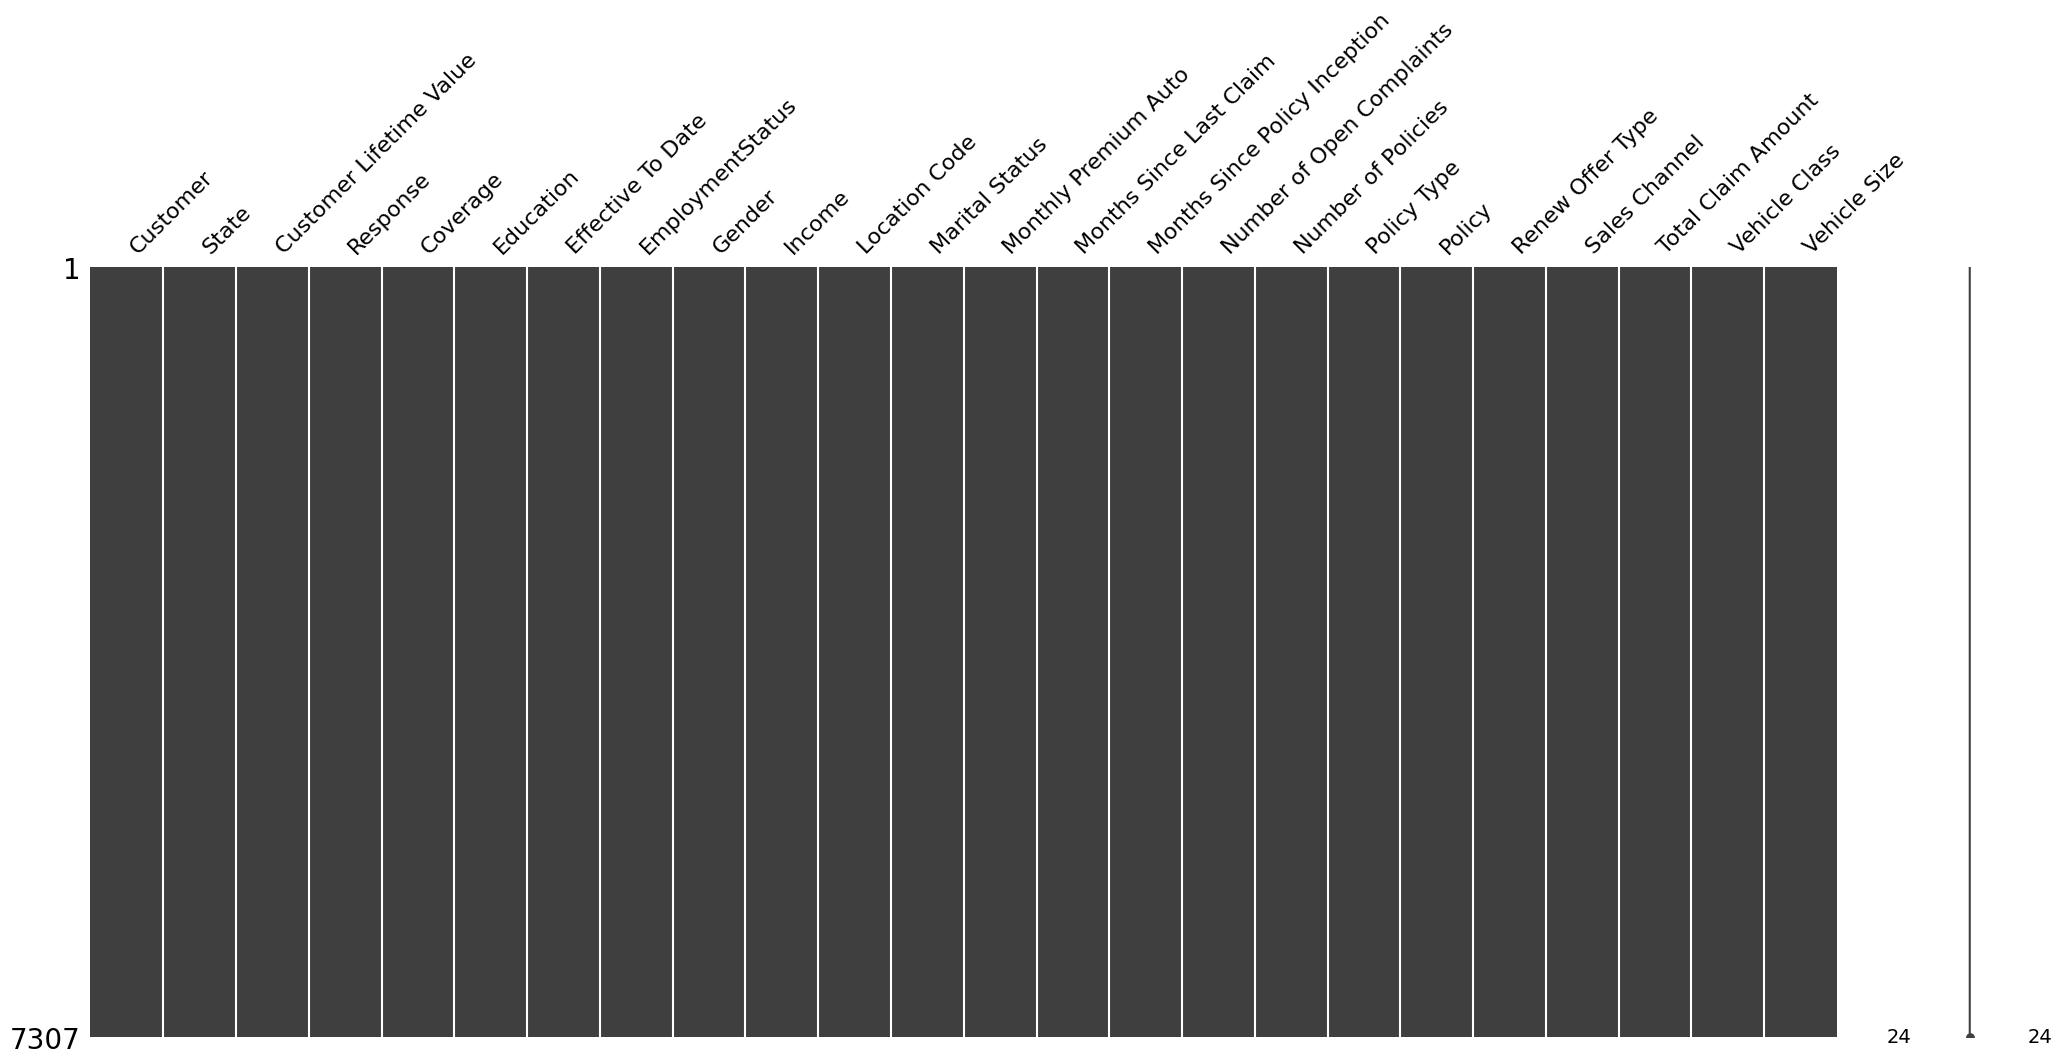

In [10]:
# visuallization mising values using msno

%matplotlib inline
msno.matrix(df)
plt.show()

In [11]:
df.duplicated().sum()

0

### **2.3.1 Distribution**

In [12]:
# Grouping all the features based on their category

cat_columns = ['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',  'Number of Policies',
       'Vehicle Class', 'Vehicle Size']

con_columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount']

disc_columns = ['Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints']

numerical_columns = con_columns + disc_columns

In [13]:
# distribution of categorical features

def create_pivot(feature):
    df_counts = df[feature].value_counts().reset_index()
    df_counts.columns = [feature, 'Total']

    df_counts['%'] = (df_counts['Total'] / df_counts['Total'].sum() * 100).round(1)

    df_counts.loc['Total'] = df_counts[['Total', '%']].sum()
    df_counts.at['Total', feature] = 'Total'

    return df_counts

for k in cat_columns:
    display(create_pivot(k))
    print()


,State,Total,%
0,California,2548.0,34.9
1,Oregon,2043.0,28.0
2,Arizona,1362.0,18.6
3,Nevada,727.0,9.9
4,Washington,627.0,8.6
Total,Total,7307.0,100.0


,Response,Total,%
0,No,6264.0,85.7
1,Yes,1043.0,14.3
Total,Total,7307.0,100.0


,Coverage,Total,%
0,Basic,4445.0,60.8
1,Extended,2208.0,30.2
2,Premium,654.0,9.0
Total,Total,7307.0,100.0


,Education,Total,%
0,Bachelor,2236.0,30.6
1,College,2119.0,29.0
2,High School or Below,2093.0,28.6
3,Master,575.0,7.9
4,Doctor,284.0,3.9
Total,Total,7307.0,100.0


,EmploymentStatus,Total,%
0,Employed,4561.0,62.4
1,Unemployed,1862.0,25.5
2,Medical Leave,343.0,4.7
3,Disabled,307.0,4.2
4,Retired,234.0,3.2
Total,Total,7307.0,100.0


,Gender,Total,%
0,F,3729.0,51.0
1,M,3578.0,49.0
Total,Total,7307.0,100.0


,Location Code,Total,%
0,Suburban,4612.0,63.1
1,Rural,1403.0,19.2
2,Urban,1292.0,17.7
Total,Total,7307.0,100.0


,Marital Status,Total,%
0,Married,4231.0,57.9
1,Single,1996.0,27.3
2,Divorced,1080.0,14.8
Total,Total,7307.0,100.0


,Policy Type,Total,%
0,Personal Auto,5413.0,74.1
1,Corporate Auto,1575.0,21.6
2,Special Auto,319.0,4.4
Total,Total,7307.0,100.1


,Policy,Total,%
0,Personal L3,2770.0,37.9
1,Personal L2,1660.0,22.7
2,Personal L1,983.0,13.5
3,Corporate L3,806.0,11.0
4,Corporate L2,488.0,6.7
5,Corporate L1,281.0,3.8
6,Special L2,141.0,1.9
7,Special L3,127.0,1.7
8,Special L1,51.0,0.7
Total,Total,7307.0,99.9


,Renew Offer Type,Total,%
0,Offer1,3010.0,41.2
1,Offer2,2331.0,31.9
2,Offer3,1150.0,15.7
3,Offer4,816.0,11.2
Total,Total,7307.0,100.0


,Sales Channel,Total,%
0,Agent,2783.0,38.1
1,Branch,2064.0,28.2
2,Call Center,1405.0,19.2
3,Web,1055.0,14.4
Total,Total,7307.0,99.9


,Number of Policies,Total,%
0,1.0,2637.0,36.1
1,2.0,1824.0,25.0
2,3.0,920.0,12.6
3,9.0,336.0,4.6
4,7.0,334.0,4.6
5,4.0,330.0,4.5
6,5.0,325.0,4.4
7,8.0,302.0,4.1
8,6.0,299.0,4.1
Total,Total,7307.0,100.0


,Vehicle Class,Total,%
0,Four-Door Car,3696.0,50.6
1,Two-Door Car,1518.0,20.8
2,SUV,1410.0,19.3
3,Sports Car,396.0,5.4
4,Luxury SUV,152.0,2.1
5,Luxury Car,135.0,1.8
Total,Total,7307.0,100.0


,Vehicle Size,Total,%
0,Medsize,5123.0,70.1
1,Small,1418.0,19.4
2,Large,766.0,10.5
Total,Total,7307.0,100.0


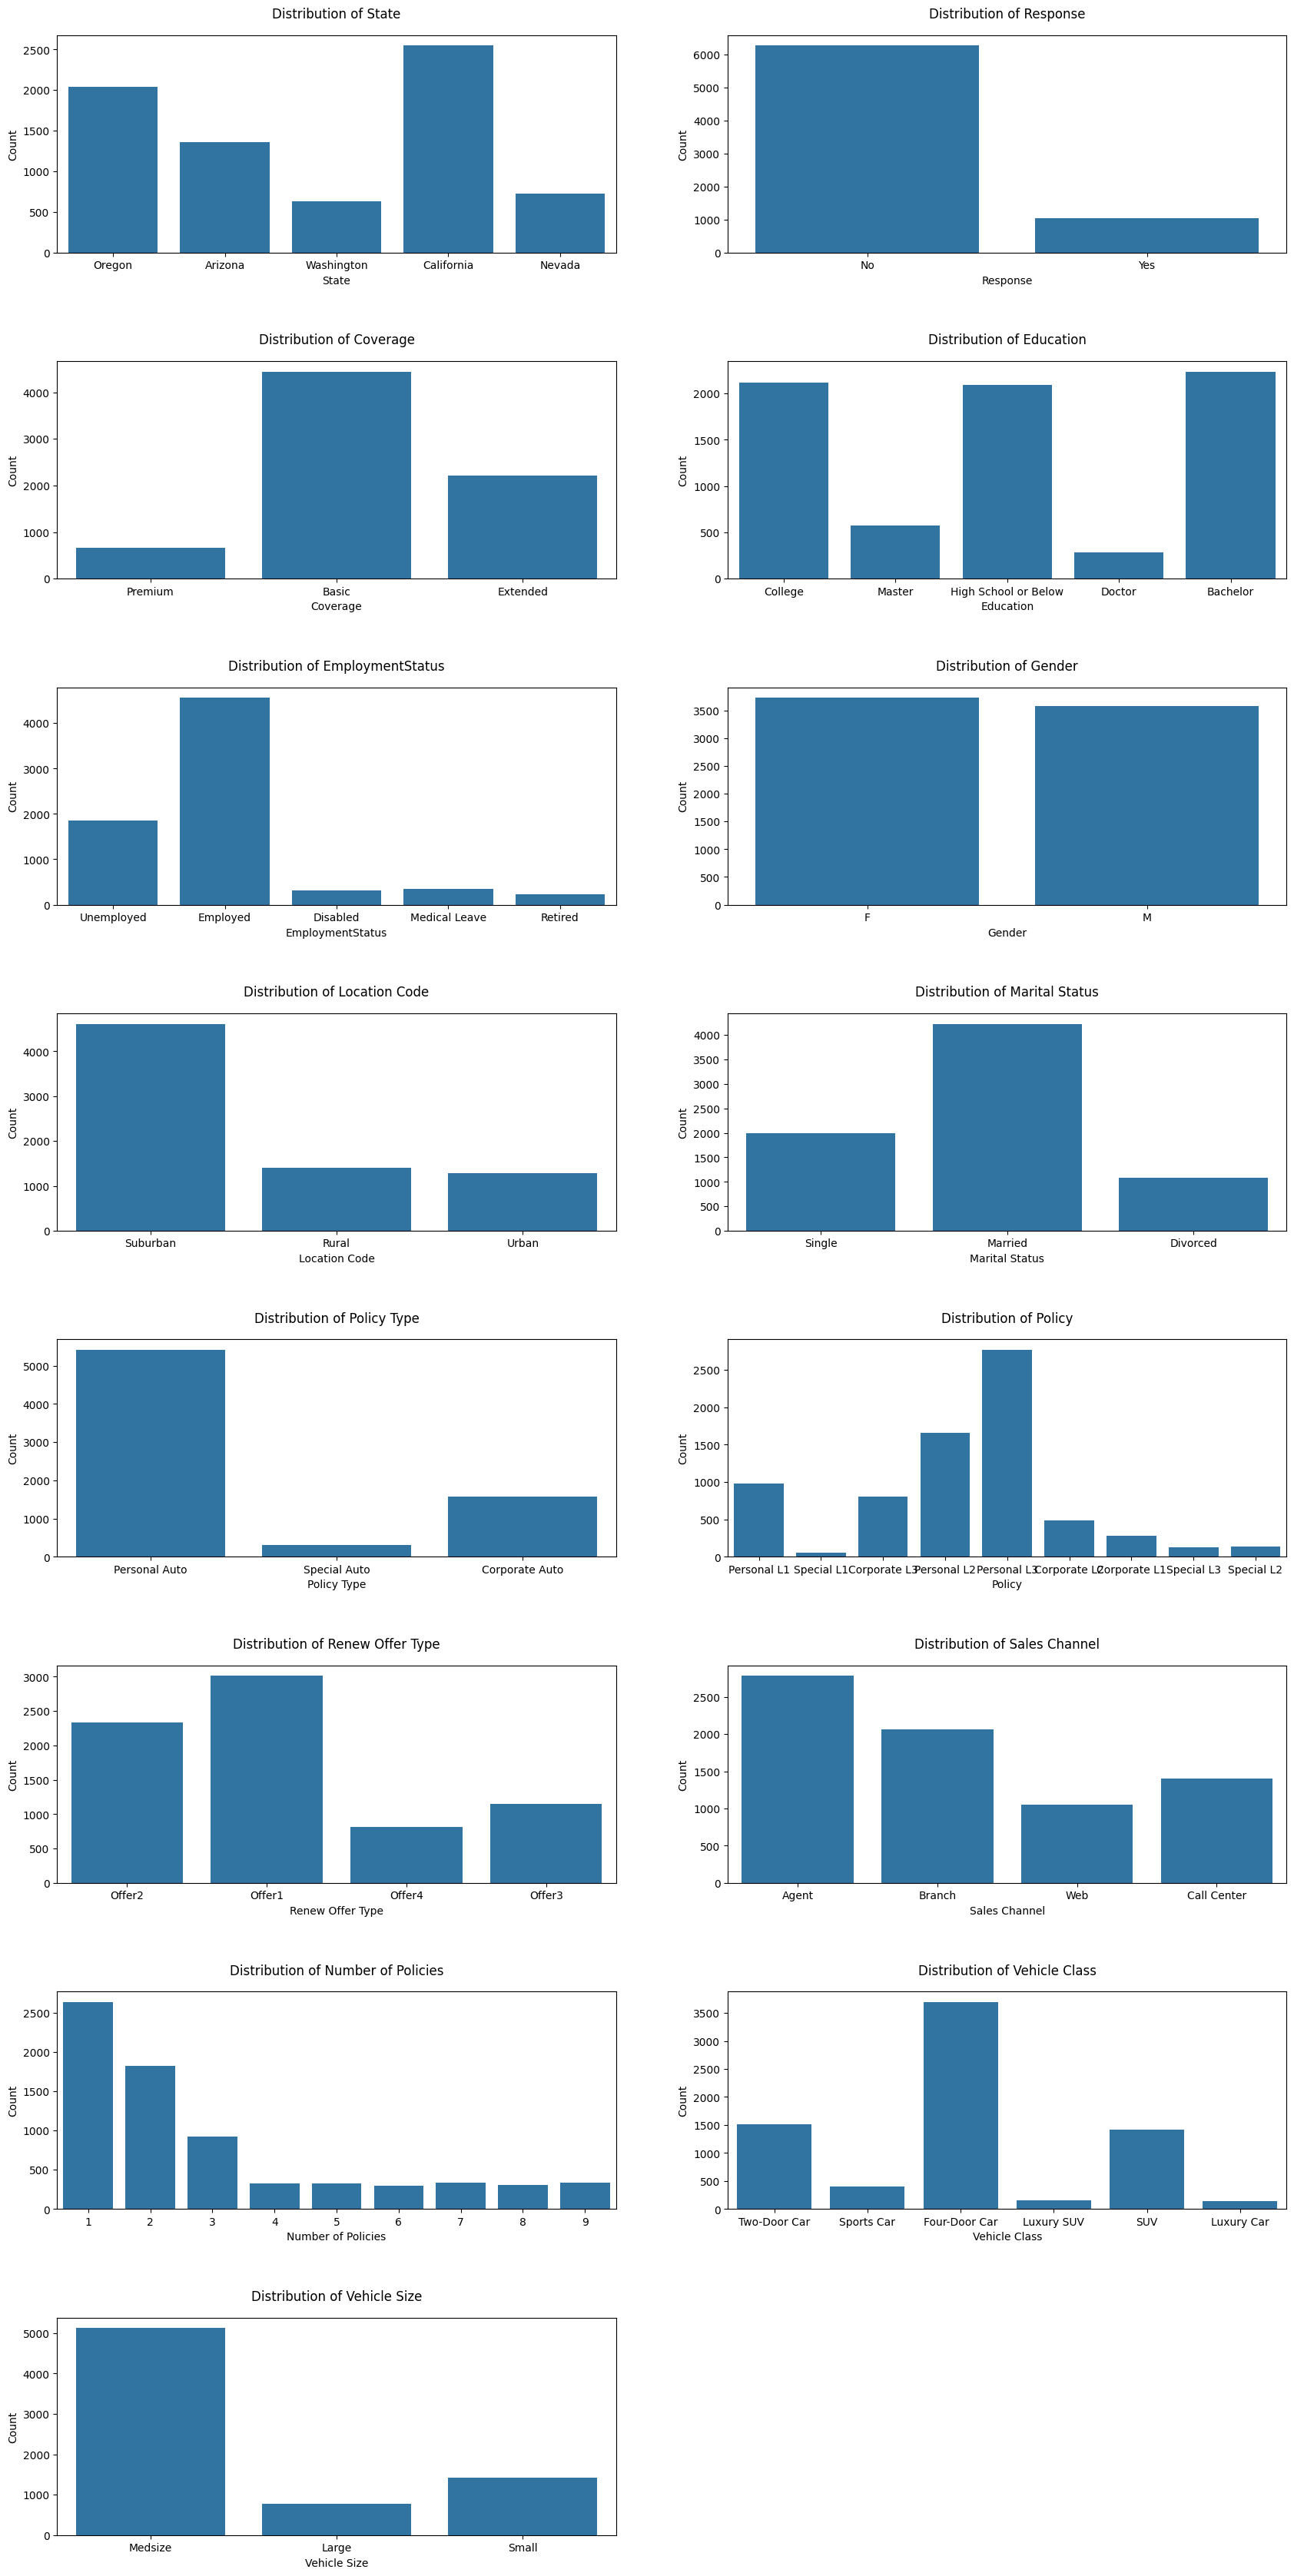

In [14]:
# Distribution of categorical features

fig, ax = plt.subplots(15, 2, figsize=(20, 5 * len(cat_columns)))
ax = ax.flatten()

for i, column in enumerate(cat_columns):
    sns.countplot(
        x=column,
        data=df,
        ax=ax[i]
    )
    ax[i].set_title(f'Distribution of {column}', y=1.05)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Count')

for j in range(len(cat_columns), len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, wspace=0.2, hspace=0.5)
plt.show()


**Geographic Distribution**: California leads with
34.9% of customers, followed by Oregon at 28.0%. Fewer customers are from Nevada (9.9%) and Washington (8.6%).

**Response Rates**: A majority of customers (85.7%) did not respond to offers, while 14.3% did respond.

**Coverage Types**: Basic coverage is most common (60.8%), with Extended coverage at 30.2% and Premium at 9.0%.

**Education Levels:** The most prevalent education levels are Bachelor’s (30.6%) and College (29.0%). Fewer customers have advanced degrees: Master’s (7.9%) or Doctorate (3.9%).

**Employment Status**: A majority are employed (62.4%), with a significant portion unemployed (25.5%) and smaller groups on medical leave (4.7%) or disabled (4.2%).

**Gender:** There is a near-even gender distribution, with females slightly more common (51%) than males (49%).

**Location Code:** Most customers reside in Suburban areas (63.1%), followed by Rural (19.2%) and Urban (17.7%).

**Marital Status**: Married individuals constitute the largest group (57.9%), with singles at 27.3% and divorced individuals at 14.8%.

**Policy Type:** Personal Auto policies dominate (74.1%), with Corporate Auto policies at 21.6% and Special Auto at 4.4%.

**Policy:** The most frequent policies are Personal L3 (37.9%) and Personal L2 (22.7%).

**Renewal Offers:** Offer1 is the most common (41.2%), followed by Offer2 (31.9%) and others.

**Sales Channels:** Agents are the primary sales channel (38.1%), with Branches (28.2%) and Call Centers (19.2%) also notable.

**Number of Policies:**	Majority of customers hold 1 Policy about 36% from the total of customer following 2 policies around a quarter and 12% for 3 policies.

**Vehicle Class:** Four-Door Cars are the most common (50.6%), with Two-Door Cars (20.8%) and SUVs (19.3%) also significant.

**Vehicle Size:** Most vehicles are Medium-sized (70.1%), with smaller proportions being Small (19.4%) or Large (10.5%).

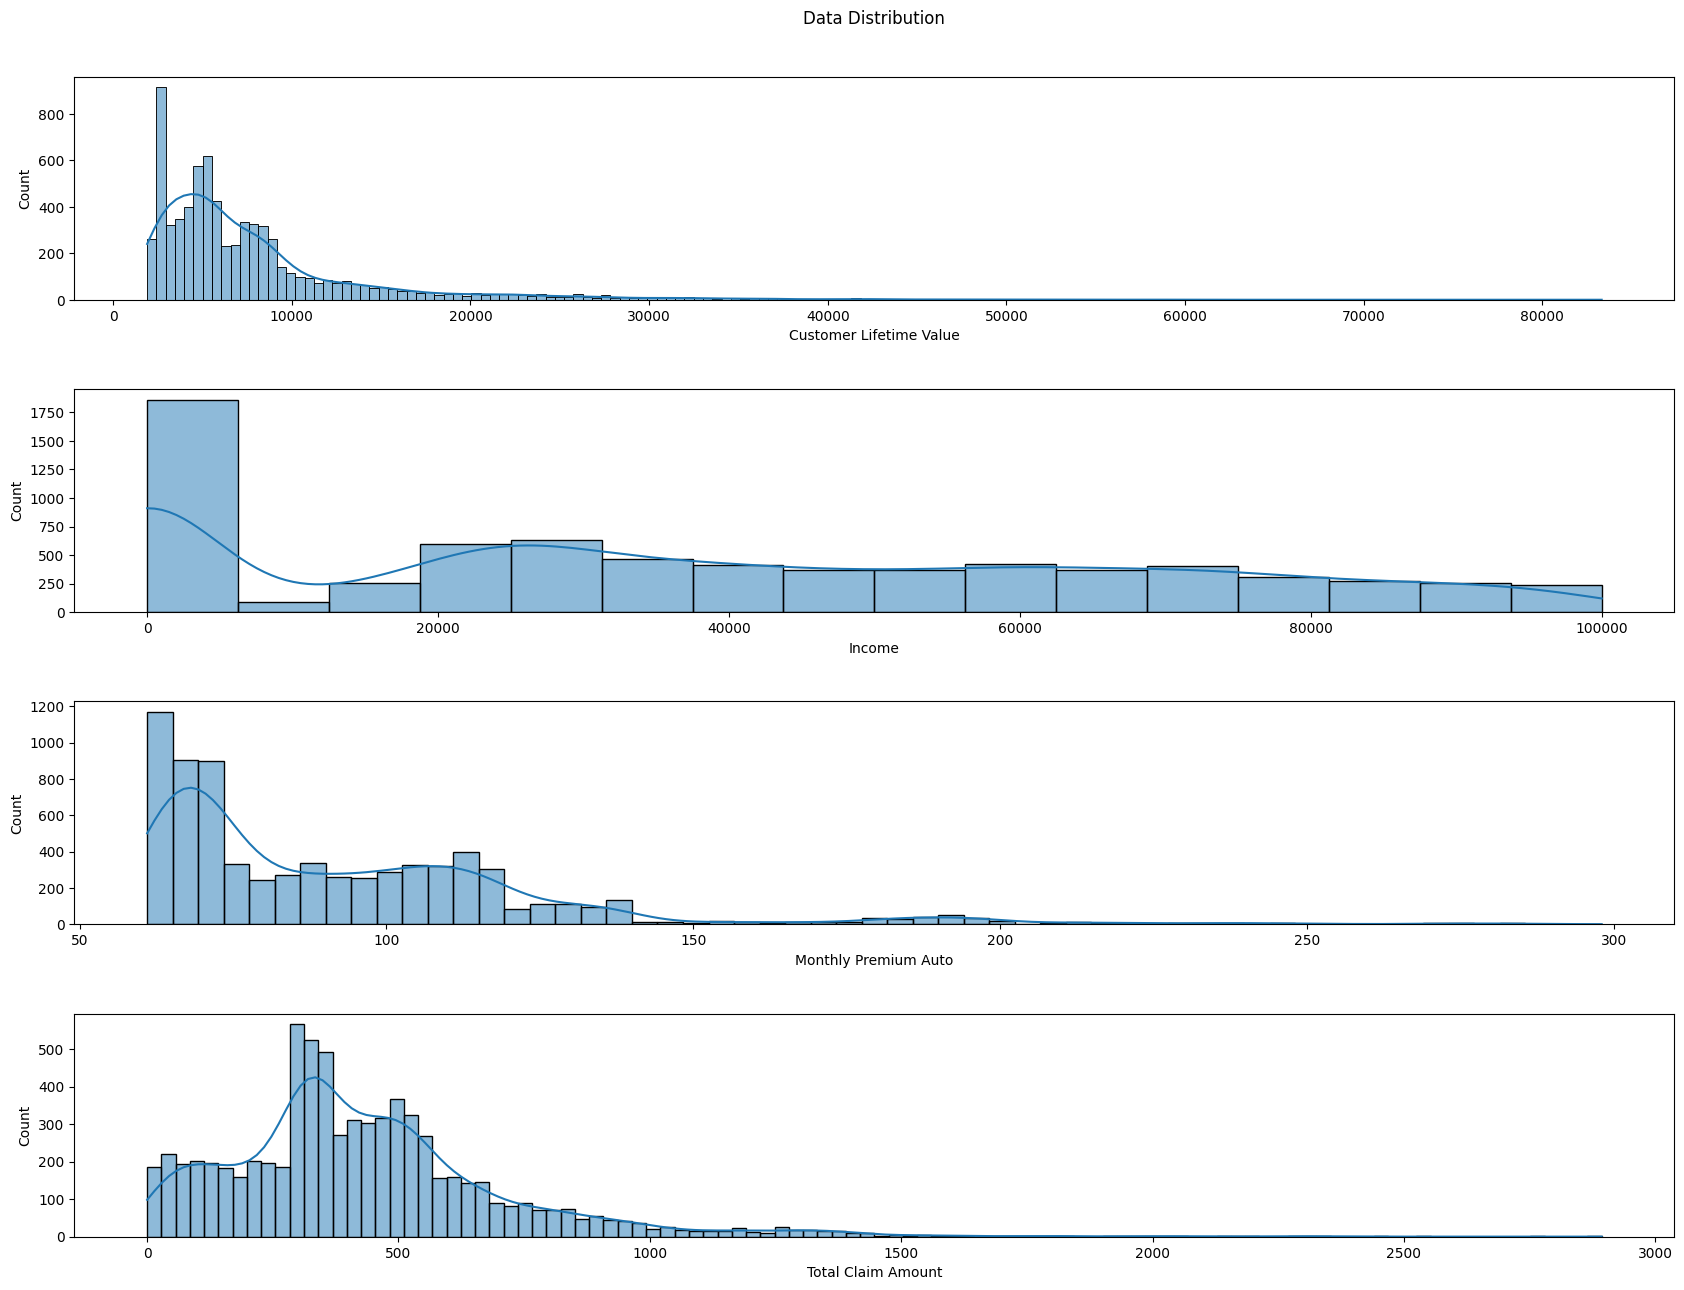

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(20, 5*len(con_columns)))

for column in range(len(con_columns)):
    sns.histplot(
        x=con_columns[column],
        data=df,
        kde=True,
        ax=ax[column]
    )
ax[0].set_title('Data Distribution', y = 1.2)
plt.subplots_adjust(
    left = 0.1, bottom = 0.3, right = 0.9, wspace = 0.1, hspace = 0.4
)

In [18]:
# Calculate multiple quantiles
clv_quantiles = df['Customer Lifetime Value'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# Display the quantiles
print("Quantiles for Customer Lifetime Value:")
print(clv_quantiles)

Quantiles for Customer Lifetime Value:
0.10     2656.793226
0.25     3945.980067
0.50     5739.823806
0.75     8988.409579
0.90    15505.004974
Name: Customer Lifetime Value, dtype: float64


>The descriptive statistics for **Customer Lifetime Value (CLV)** highlight its skewed distribution. The 10th percentile is \$2,657, the 25th percentile is \$3,946, the median is \$5,740, the 75th percentile is \$8,988, and the 90th percentile is \$15,505, illustrating a wide range of values with a concentration in lower values. This skew is further emphasized by the minimum value of \$1,898 and a maximum of \$83,325, showing that while most customers have a moderate CLV, a few have significantly higher values. Additionally, the presence of **zero income values** in the dataset suggests potential anomalies or missing data that should be further investigated.

In [19]:
income_0 = df[df['Income'] == 0]
income_0['Monthly Premium Auto'].describe()

count    1862.000000
mean       93.722879
std        33.495956
min        61.000000
25%        69.000000
50%        83.000000
75%       110.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [20]:
income_83_93 = df[(df['Monthly Premium Auto'] >= 83.000) & (df['Monthly Premium Auto'] <= 93.722879)]
income_83_93['Income'].describe()

count      734.000000
mean     36969.500000
std      29295.268426
min          0.000000
25%      11921.250000
50%      32306.500000
75%      60857.250000
max      99816.000000
Name: Income, dtype: float64

In [21]:
# fill income 0 with median income based on Monthly Premium Paid

df['Income'] = df['Income'].replace(0, 32306.500000)

In [22]:
df['Income'].describe().T

count     7307.000000
mean     45984.297386
std      22384.844636
min      10037.000000
25%      32306.500000
50%      34080.000000
75%      62611.000000
max      99981.000000
Name: Income, dtype: float64

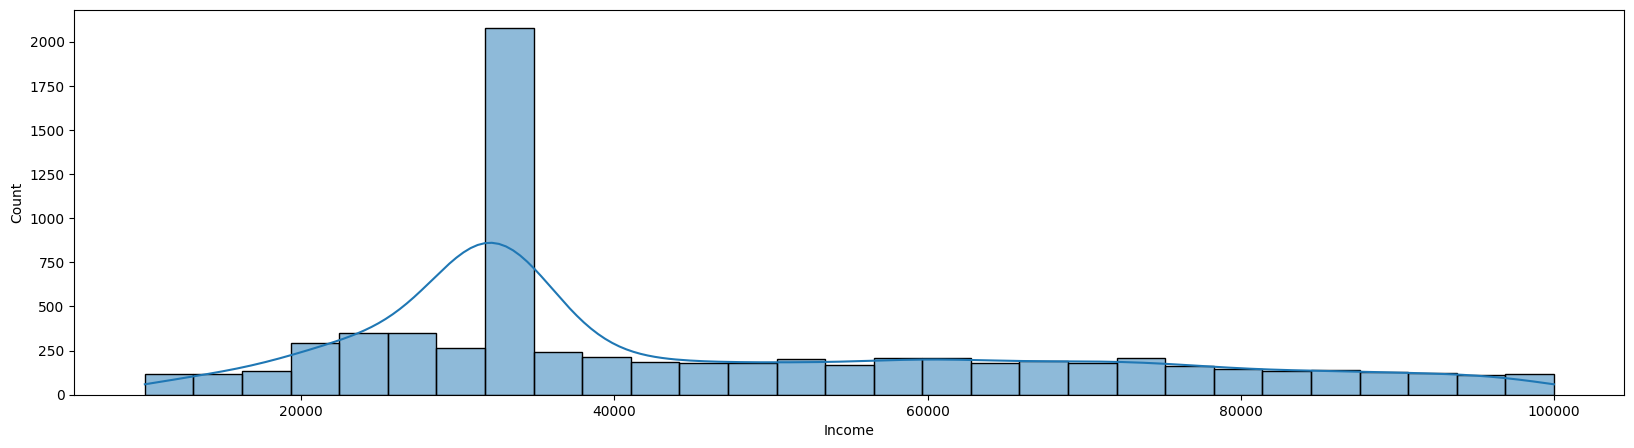

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(df['Income'], kde=True)
plt.show()

### **2.3.2 Correlation**

<Axes: >

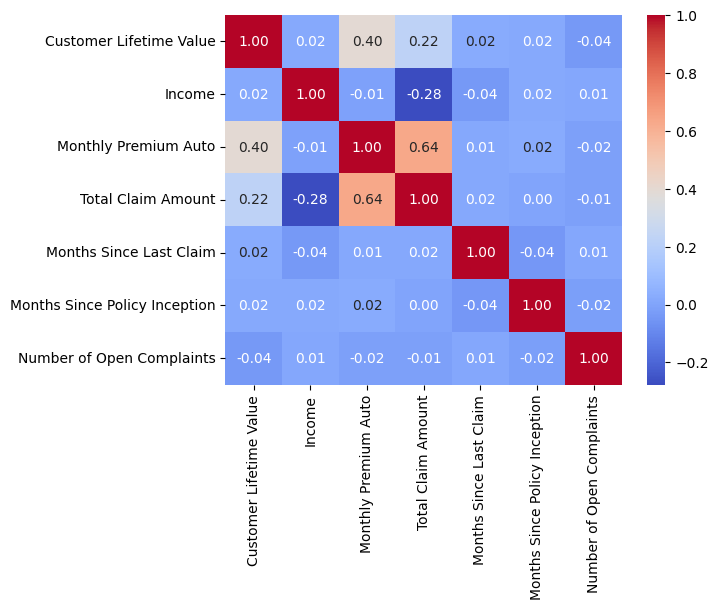

In [24]:
# correlation between numerical features

df_num_corr = df[numerical_columns].corr()
sns.heatmap(data=df_num_corr, annot=True, fmt=".2f", cmap="coolwarm")

> **Customer Lifetime Value** exhibits a moderate positive correlation with **Monthly Premium Auto** (0.40) and **Total Claim Amount** (0.22), suggesting that higher premiums and claim amounts are somewhat linked to greater lifetime values. There is a strong positive correlation between **Monthly Premium Auto** and **Total Claim Amount** (0.64), indicating that higher premiums generally correspond to higher claims. In contrast, **Income** shows a significant negative correlation with **Total Claim Amount** (-0.28), implying that higher incomes are associated with lower claim amounts. Other factors, such as **Months Since Last Claim** and **Number of Open Complaints**, have weak correlations with **Customer Lifetime Value**, suggesting they have a limited impact on lifetime value.

### **2.3.3 Outliers**

In [25]:
# Checking outliers

def calculate_outliers(data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[
        (data[column] < lower_bound) | (data[column] > upper_bound)
    ]
    return outliers, lower_bound, upper_bound

outlier_data = []

for i in con_columns:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier / len(df[i]) * 100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=[
    'column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'
])

outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Customer Lifetime Value,639,8.75,-3617.664201,16552.053847
1,Income,0,0.00,-13150.250000,108067.750000
2,Monthly Premium Auto,356,4.87,6.500000,170.500000
3,Total Claim Amount,362,4.95,-145.126517,962.595911


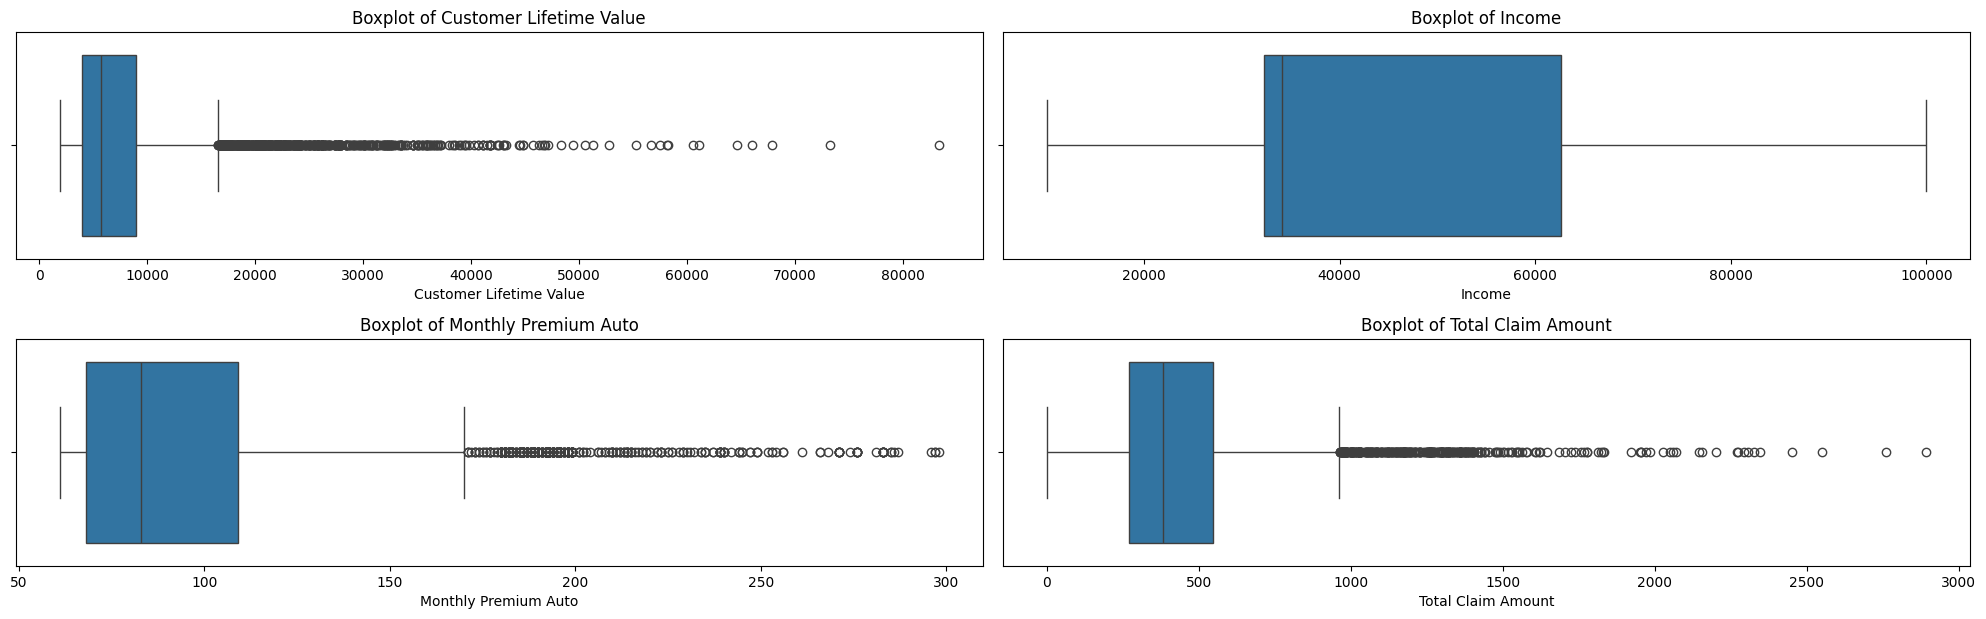

In [26]:
# Outliers Visualization for continous features

plt.figure(figsize=(20, 3 * len (con_columns)))
for i, column in enumerate(con_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

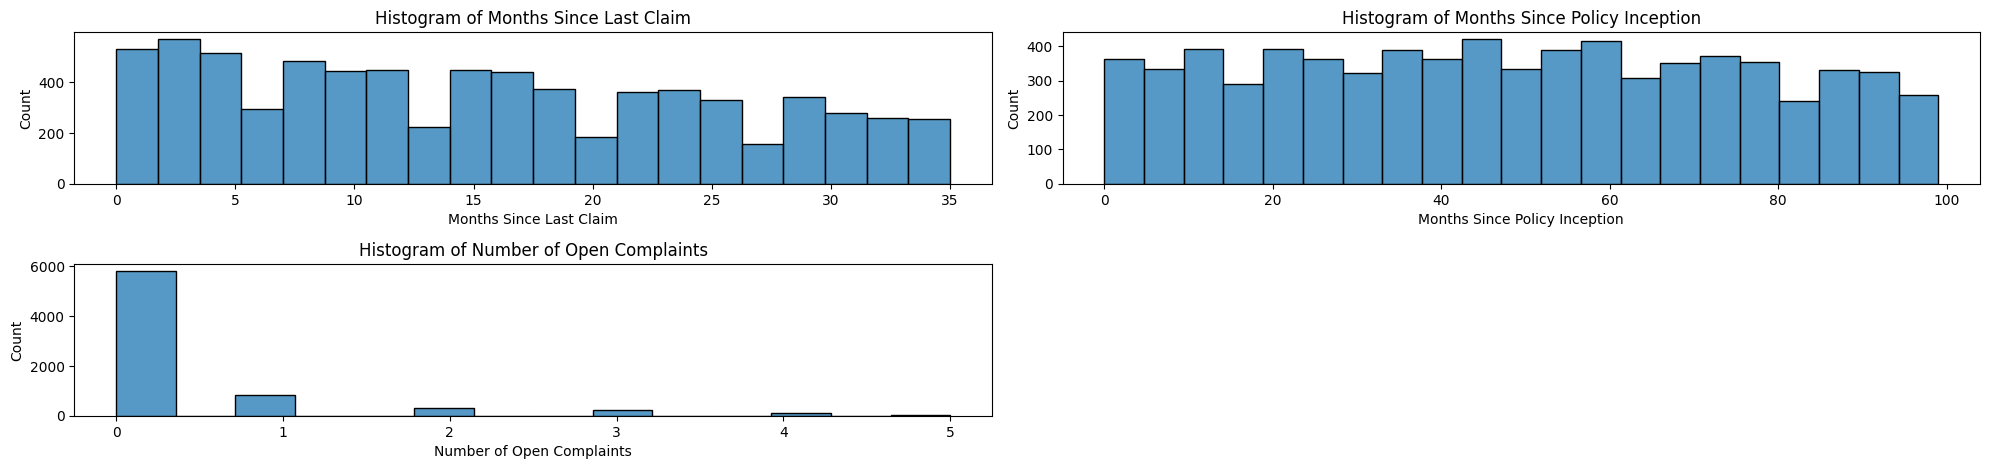

In [27]:
# Outliers Visualization for discrete features

plt.figure(figsize=(20, 3 * len(disc_columns)))
for i, column in enumerate(disc_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(x=df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

----

# **3. Data Analysis**

## **3.1 Customer Characteristics**

In [28]:
df_cust_chraracteristics = df[['Customer', 'State', 'Coverage',
                              'Education', 'EmploymentStatus', 'Gender',
                              'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
                              'Number of Open Complaints', 'Number of Policies', 'Policy Type',
                              'Policy', 'Total Claim Amount',
                              'Vehicle Class', 'Vehicle Size']]

df_cust_chraracteristics.head()

,Customer,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Policy Type,Policy,Total Claim Amount,Vehicle Class,Vehicle Size
3773,MP13698,Oregon,Premium,College,Unemployed,F,32306.5,Suburban,Single,111,0,3,Personal Auto,Personal L1,532.800000,Two-Door Car,Medsize
415,ZF84449,Oregon,Basic,College,Unemployed,F,32306.5,Suburban,Single,112,1,1,Special Auto,Special L1,806.400000,Sports Car,Medsize
6465,OZ47099,Arizona,Basic,Master,Unemployed,M,32306.5,Suburban,Married,71,0,1,Corporate Auto,Corporate L3,340.800000,Four-Door Car,Medsize
2323,KM52241,Arizona,Basic,High School or Below,Unemployed,F,32306.5,Rural,Married,74,0,2,Personal Auto,Personal L1,47.502366,Four-Door Car,Medsize
1826,WH11924,Washington,Basic,College,Unemployed,M,32306.5,Suburban,Single,71,0,3,Personal Auto,Personal L2,697.186307,Two-Door Car,Large


In [30]:
def calculate_percentage_pivot(df, index_columns, value_column):
    pivot_table = df.pivot_table(
        index=index_columns,
        values=value_column,
        aggfunc='sum'
    ).reset_index()

    # pivot_table.rename(columns={value_column: 'Total Claim Amount'}, inplace=True)  # Rename column for clarity
    pivot_table['Percentage'] = (pivot_table[value_column] / pivot_table[value_column].sum()) * 100
    sorted_pivot_table = pivot_table.sort_values(by='Percentage', ascending=False)

    return sorted_pivot_table

### **3.1.1 Revenue-Generating charachteristics**


In [31]:
# Customer Characteristics (based on Location and State)

calculate_percentage_pivot(df_cust_chraracteristics, ['Location Code', 'State'], 'Monthly Premium Auto').head(10)

,Location Code,State,Monthly Premium Auto,Percentage
6,Suburban,California,156333,22.930763
8,Suburban,Oregon,121608,17.837336
5,Suburban,Arizona,80940,11.872196
7,Suburban,Nevada,43750,6.417205
1,Rural,California,43610,6.396670
11,Urban,California,39767,5.832983
9,Suburban,Washington,37833,5.549305
3,Rural,Oregon,36708,5.384292
13,Urban,Oregon,31336,4.596332
0,Rural,Arizona,22854,3.352201


In [32]:
# Customer Characteristics (based on Education and Employment Status)

calculate_percentage_pivot(df_cust_chraracteristics, ['Education', 'EmploymentStatus'], 'Monthly Premium Auto').head(5)

,Education,EmploymentStatus,Monthly Premium Auto,Percentage
1,Bachelor,Employed,129165,18.945789
6,College,Employed,120046,17.608223
16,High School or Below,Employed,117735,17.269248
19,High School or Below,Unemployed,59814,8.773456
4,Bachelor,Unemployed,52421,7.689058


In [33]:
# Customer Characteristics (based on Marital Status and Gender)

calculate_percentage_pivot(df_cust_chraracteristics, ['Gender', 'Marital Status'], 'Monthly Premium Auto').head(10)

,Gender,Marital Status,Monthly Premium Auto,Percentage
1,F,Married,205292,30.112019
4,M,Married,188274,27.615836
5,M,Single,98593,14.461520
2,F,Single,89184,13.081417
0,F,Divorced,52878,7.756090
3,M,Divorced,47540,6.973118


In [34]:
# Customer Characteristics (based on Policy Type and Number of Policies)

calculate_percentage_pivot(df_cust_chraracteristics, ['Policy Type', 'Number of Policies'], 'Monthly Premium Auto').head(10)

,Policy Type,Number of Policies,Monthly Premium Auto,Percentage
9,Personal Auto,1,184748,27.098646
10,Personal Auto,2,126371,18.535968
11,Personal Auto,3,61441,9.012102
0,Corporate Auto,1,53230,7.807721
1,Corporate Auto,2,36625,5.372117
15,Personal Auto,7,23433,3.437128
17,Personal Auto,9,23238,3.408526
13,Personal Auto,5,22494,3.299397
12,Personal Auto,4,21282,3.121622
16,Personal Auto,8,20843,3.057230


In [35]:
# Customer Characteristics (based on Vehicle Class and Size)

calculate_percentage_pivot(df_cust_chraracteristics, ['Vehicle Class', 'Vehicle Size'], 'Monthly Premium Auto').head(10)

,Vehicle Class,Vehicle Size,Monthly Premium Auto,Percentage
1,Four-Door Car,Medsize,199591,29.275802
10,SUV,Medsize,123917,18.176018
16,Two-Door Car,Medsize,78595,11.528234
2,Four-Door Car,Small,56161,8.237638
13,Sports Car,Medsize,36417,5.341608
11,SUV,Small,30553,4.481483
0,Four-Door Car,Large,30115,4.417237
17,Two-Door Car,Small,24417,3.581460
7,Luxury SUV,Medsize,21979,3.223857
4,Luxury Car,Medsize,18586,2.726175


In [36]:
# Customer Characteristics (based on Policy and Vehicle Class)

calculate_percentage_pivot(df_cust_chraracteristics, ['Policy', 'Vehicle Class'], 'Monthly Premium Auto').head(10)

,Policy,Vehicle Class,Monthly Premium Auto,Percentage
30,Personal L3,Four-Door Car,110047,16.141580
33,Personal L3,SUV,64122,9.405349
24,Personal L2,Four-Door Car,63886,9.370733
35,Personal L3,Two-Door Car,42826,6.281673
27,Personal L2,SUV,39527,5.797780
18,Personal L1,Four-Door Car,39386,5.777098
12,Corporate L3,Four-Door Car,28777,4.220981
29,Personal L2,Two-Door Car,28217,4.138840
15,Corporate L3,SUV,20267,2.972743
21,Personal L1,SUV,20236,2.968196


**Summary of customer 'Revenue-Generating' Characteristics**

**Geographic Distribution:**
In terms of revenue from monthly auto premiums, suburban areas dominate. California leads with a significant contribution of \(\$156,333\), followed by Oregon \(\$121,608\), Arizona \(\$80,940\), and Nevada \(\$43,750\). Rural areas contribute less, with California adding \(\$43,610\) in the fifth place.

**Education and Employment Status:**
People with a Bachelor’s degree and employed are the top revenue generators, contributing \(\$129,165\). Those with a college education and employed also contribute significantly, at \(\$120,046\). Interestingly, people with a high school diploma or less, when employed, contribute a notable \(\$117,735\), but their contributions drop sharply when they are unemployed.

**Gender and Marital Status:**
Married individuals, especially females, are the largest contributors to premium revenue. Female married individuals bring in \(\$205,292\), while male married individuals contribute \(\$188,274\). Single males and females contribute less, with males at \(\$98,593\) and females at \(\$89,184\). Divorced individuals contribute the least, with females at \(\$52,878\) and males at \(\$47,540\).

**Policy Type:**
Personal auto policies are the main source of revenue. A single personal auto policy generates \(\$184,748\), and the revenue decreases as the number of policies increases. Corporate auto policies generate less, with the highest single policy contributing \(\$53,230\).

**Vehicle Class and Size:**
Four-door cars in the medium size category are the top revenue generators, accounting for \(\$199,591\). SUVs also contribute significantly with \(\$123,917\), while two-door cars and small four-door cars contribute less. Sports cars bring in the smallest share at \(\$36,417\).

**Policy and Vehicle Class:**
Among different policy types, Personal L3 policies for four-door cars lead in revenue, contributing \(\$110,047\). SUV policies under Personal L3 and Personal L2 categories follow, with contributions of \(\$64,122\) and \(\$39,527\) respectively. Two-door car policies under Personal L3 generate \(\$42,826\), and Personal L2 policies for four-door cars contribute \(\$63,886\).

### **3.1.2 Losses-Related charachteristics**

In [38]:
# Customer Characteristics (based on Coverage, Policy Type and Total Claim Amount)
pd.options.display.float_format = '{:.2f}'.format
calculate_percentage_pivot(df_cust_chraracteristics, ['Coverage', 'Policy Type'], 'Total Claim Amount').head(10)

,Coverage,Policy Type,Total Claim Amount,Percentage
1,Basic,Personal Auto,1253200.18,39.46
4,Extended,Personal Auto,785336.71,24.73
0,Basic,Corporate Auto,363856.32,11.46
7,Premium,Personal Auto,311043.42,9.79
3,Extended,Corporate Auto,220594.10,6.95
6,Premium,Corporate Auto,100988.80,3.18
2,Basic,Special Auto,71924.00,2.26
5,Extended,Special Auto,52473.04,1.65
8,Premium,Special Auto,16853.86,0.53


In [39]:
# Customer Characteristics (based on coverage = basic)

x = df_cust_chraracteristics[(df_cust_chraracteristics['Coverage']=='Basic') ]
x[['Monthly Premium Auto', 'Total Claim Amount']].describe()

,Monthly Premium Auto,Total Claim Amount
count,4445.00,4445.00
mean,82.26,379.97
std,27.86,248.99
min,61.00,0.10
25%,65.00,243.21
50%,70.00,333.70
75%,102.00,494.40
max,199.00,2327.17


In [40]:
# Customer Characteristics (based on Gender and Vehicle Class)

calculate_percentage_pivot(df_cust_chraracteristics, ['Gender', 'Vehicle Class'], 'Total Claim Amount').head(10)

,Gender,Vehicle Class,Total Claim Amount,Percentage
0,F,Four-Door Car,654678.39,20.61
6,M,Four-Door Car,639335.11,20.13
9,M,SUV,415882.19,13.09
3,F,SUV,393468.90,12.39
11,M,Two-Door Car,281289.05,8.86
5,F,Two-Door Car,253057.35,7.97
4,F,Sports Car,114068.71,3.59
10,M,Sports Car,106889.17,3.37
8,M,Luxury SUV,98619.52,3.10
7,M,Luxury Car,87570.29,2.76


In [41]:
# Customer Characteristics (based on Education and Employment Status)

calculate_percentage_pivot(df_cust_chraracteristics, ['Education', 'EmploymentStatus'], 'Total Claim Amount').head(10)

,Education,EmploymentStatus,Total Claim Amount,Percentage
1,Bachelor,Employed,496048.66,15.62
16,High School or Below,Employed,490630.13,15.45
6,College,Employed,453080.95,14.26
19,High School or Below,Unemployed,415008.88,13.07
4,Bachelor,Unemployed,326825.51,10.29
9,College,Unemployed,318768.28,10.04
21,Master,Employed,131341.17,4.14
11,Doctor,Employed,64081.13,2.02
7,College,Medical Leave,57262.51,1.80
2,Bachelor,Medical Leave,52293.66,1.65


In [42]:
# Customer Characteristics (based on Marital Status and Gender)

calculate_percentage_pivot(df_cust_chraracteristics, ['Gender', 'Marital Status'], 'Total Claim Amount').head(10)

,Gender,Marital Status,Total Claim Amount,Percentage
4,M,Married,817405.28,25.73
1,F,Married,812712.27,25.59
5,M,Single,604280.48,19.02
2,F,Single,508132.54,16.00
0,F,Divorced,225840.28,7.11
3,M,Divorced,207899.58,6.55


In [43]:
# Customer Characteristics (based on Vehicle Class and Size)

calculate_percentage_pivot(df_cust_chraracteristics, ['Vehicle Class', 'Vehicle Size'], 'Total Claim Amount').head(10)

,Vehicle Class,Vehicle Size,Total Claim Amount,Percentage
1,Four-Door Car,Medsize,845086.06,26.61
10,SUV,Medsize,588342.30,18.52
16,Two-Door Car,Medsize,341493.67,10.75
2,Four-Door Car,Small,316878.06,9.98
13,Sports Car,Medsize,160695.71,5.06
11,SUV,Small,147306.28,4.64
17,Two-Door Car,Small,135053.54,4.25
0,Four-Door Car,Large,132049.39,4.16
7,Luxury SUV,Medsize,110205.61,3.47
4,Luxury Car,Medsize,96790.96,3.05


**Summary of Losses-Related Characteristics**

**Coverage and Policy Type:**
When it comes to total claim amounts, Basic Personal Auto coverage is the largest contributor, with a substantial \(\$1,253,200\), making up 39.46% of the total claims. Extended Personal Auto coverage follows with \(\$785,336\), which is 24.73% of the total. Corporate Auto policies also make a significant impact, particularly Basic coverage at \(\$363,856\), while Premium Corporate Auto coverage contributes \(\$100,989\). Special Auto policies contribute less overall, with Basic and Extended coverages at \(\$71,924\) and \(\$52,473\) respectively, and Premium Special Auto coverage at \(\$16,854\).

**Monthly Premiums and Claim Amounts:**
The average total claim amount across policies is \(\$379.97\), with a standard deviation of \(\$248.99\). Monthly premiums range from a minimum of \(\$61\) to a maximum of \(\$199\). The median claim amount is \(\$333.70\), indicating that half of the claims fall below this value, while the 75th percentile reaches \(\$494.40\), highlighting higher claims in the top quartile.

**Gender and Vehicle Class:**
In terms of total claim amounts, females with Four-Door Cars lead with \(\$654,678\), slightly ahead of males with Four-Door Cars who claim \(\$639,335\). SUVs are also notable, with males claiming \(\$415,882\) and females \(\$393,469\). Two-Door Cars and Sports Cars contribute less, with claims of \(\$281,289\) and \(\$114,069\) for males, and \(\$253,057\) and \(\$106,889\) for females respectively. Luxury vehicles contribute the least, with Luxury SUVs and Luxury Cars generating \(\$98,620\) and \(\$87,570\).

**Education and Employment Status:**
Employed individuals with a Bachelor’s degree and those with a high school diploma or less are the top claimants, with \(\$496,049\) and \(\$490,630\) respectively. College graduates and unemployed individuals also contribute significantly, with claims of \(\$453,081\) and \(\$415,009\). Claims from those on medical leave or with advanced degrees are comparatively lower, totaling \(\$57,263\) and \(\$52,294\) for those with a Bachelor’s and Master’s degrees.

**Gender and Marital Status:**
Married individuals, both male and female, account for the largest claims, with males at \(\$817,405\) and females at \(\$812,712\). Single individuals also contribute significantly, with males claiming \(\$604,280\) and females \(\$508,133\). Divorced individuals have the smallest claims, with females at \(\$225,840\) and males at \(\$207,900\).

**Vehicle Class and Size:**
Claims are highest for Four-Door Cars in the medium size category, totaling \(\$845,086\). Medium-size SUVs follow with \(\$588,342\), while Medium-size Two-Door Cars and Small Four-Door Cars contribute \(\$341,494\) and \(\$316,878\) respectively. Smaller categories, such as Small SUVs and Small Two-Door Cars, contribute less, with claims of \(\$147,306\) and \(\$135,054\). Luxury and Large vehicles also show lower claim amounts, with \(\$110,206\) for Luxury SUVs and \(\$96,791\) for Luxury Cars.


> **In summary,** the **highest revenue** is driven by **suburban California residents**, particularly those with **higher education** and **married status**, who prefer **personal auto policies** for **four-door cars**.

> **In summary,** the **highest total claim amounts** are seen in **Basic** and **Extended Personal Auto policies**, with significant claims from **both genders**, particularly for **Four-Door Cars** and  **SUVs**. **Higher education** and **employment status** also correlate with substantial claims, while **married** individuals and certain vehicle sizes lead in the claim amounts.



## **3.2 Marketing Efforts**

In [47]:
# Response customer on Marketing and their carachteristics of Marketing Offer

pivot_table = df[(df['Vehicle Size']=='Medsize')]
pivot_table = pivot_table.pivot_table(index=['Response', 'Policy Type', 'Sales Channel'], columns='Renew Offer Type', aggfunc='size', fill_value=0)
print(pivot_table.to_string(max_cols=None))

Renew Offer Type                       Offer1  Offer2  Offer3  Offer4
Response Policy Type    Sales Channel                                
No       Corporate Auto Agent             164      73      71      36
                        Branch            114      69      53      31
                        Call Center        71      54      24      36
                        Web                41      49      30      30
         Personal Auto  Agent             546     277     203     120
                        Branch            376     292     166     119
                        Call Center       239     200     136      96
                        Web               133     184      90      65
         Special Auto   Agent              39      15      10       5
                        Branch             24      16      12       7
                        Call Center         9      17       2       4
                        Web                 5      11       5       7
Yes      Corporate A

> The data provides insights into the distribution of different renewal offers based on response, policy type, and sales channel. For customers who did not respond to offers, the majority are associated with `Personal Auto` policies, with a high uptake through `Agents` and `Branches`, particularly for `Offer1` and `Offer2`. `Corporate Auto` policies also show significant numbers but less compared to `Personal Auto`. `Special Auto` policies have much lower numbers across all offers and channels.

> On the other hand, for customers who did respond, there is a notable preference for `Personal Auto` policies, especially through `Agents` and `Call Centers`, although the volumes are lower compared to non-respondents. `Corporate Auto` and `Special Auto` policies see a sharp drop in responses, with very few selecting `Offer3` or `Offer4`. Overall, the data highlights that `Personal Auto` policies are more popular across all channels and offer types, while `Special Auto` policies are less common and receive fewer responses.


In [49]:
# Ratio between yes and no response

pivot_table = pivot_table.reset_index()
yes_df = pivot_table[pivot_table['Response'] == 'Yes'].drop('Response', axis=1)
yes_df = yes_df.set_index(['Policy Type', 'Sales Channel'])
no_df = pivot_table[pivot_table['Response'] == 'No'].drop('Response', axis=1)
no_df = no_df.set_index(['Policy Type', 'Sales Channel'])

ratio_df = round(yes_df / no_df * 100 ,2).reset_index()
ratio_df.sort_values(by='Offer2', ascending=False)

Renew Offer Type,Policy Type,Sales Channel,index,Offer1,Offer2,Offer3,Offer4
8,Special Auto,Agent,250.00,23.08,60.00,0.00,0.00
0,Corporate Auto,Agent,inf,28.05,56.16,2.82,0.00
4,Personal Auto,Agent,400.00,27.84,47.29,3.45,0.00
11,Special Auto,Web,209.09,20.00,45.45,20.00,0.00
3,Corporate Auto,Web,500.00,12.20,28.57,3.33,0.00
6,Personal Auto,Call Center,300.00,5.44,27.00,0.00,0.00
7,Personal Auto,Web,271.43,20.30,25.00,2.22,0.00
10,Special Auto,Call Center,220.00,33.33,23.53,0.00,0.00
2,Corporate Auto,Call Center,700.00,11.27,22.22,0.00,0.00
9,Special Auto,Branch,233.33,4.17,18.75,0.00,0.00


The distribution of distinct renewal offers across different policy types and sales channels shows:

1. **Policy Type and Sales Channel Trends:**
   - **Agents** primarily manage Personal Auto policies, which show the highest percentage for Offer1 (27.84%) and Offer2 (47.29%). Corporate Auto policies also have a strong preference through Agents, particularly for Offer1 (28.05%). Special Auto policies are less favored, with generally low percentages across all offers.
   - **Web channels** exhibit a higher uptake for Special Auto policies, with Offer1 at 20.00%, compared to Corporate Auto (12.20%) and Personal Auto (20.30%).
   - **Call Centers** demonstrate a significant preference for Special Auto policies, notably with Offer1 at 33.33%, though they show lower percentages for other offers. Personal Auto policies have less engagement in this channel.
   - **Branches** have a relatively balanced distribution but with lower overall uptake for Special Auto policies (4.17% for Offer1) and more balanced responses for Corporate and Personal Auto policies.

2. **Offer Preferences:**
   - **Offer1** is the most favored across most channels and policy types, particularly for Personal Auto policies through Agents.
   - **Offer2** also receives notable acceptance, especially for Personal Auto policies through Agents and Web channels.
   - **Offers 3 and 4** are less popular, with minimal adoption across the board.

It shows a clear preference for **Offer1** across most categories, particularly with **Personal Auto policies**, which are most frequently handled by **Agents**. Special Auto policies, on the other hand, are less popular, and Offers 3 and 4 are rarely chosen.

## **3.2 Customer Segmentation: (RFM Analysis - Clustering)**

In [52]:
rfm_df = df[['Months Since Last Claim', 'Months Since Policy Inception', 'Customer Lifetime Value']]
rfm_df.head()

,Months Since Last Claim,Months Since Policy Inception,Customer Lifetime Value
3773,29,60,7809.86
415,7,34,3726.73
6465,17,6,2676.95
2323,20,3,8430.06
1826,3,33,4645.84


> For the RFM analysis, we're using `Months Since Last Claim` to represent recency, `Months Since Policy Inception` for frequency, and `Customer Lifetime Value` as the monetary component.

In [53]:
rfm_df.duplicated().sum()

825

In [54]:
rfm_df.drop_duplicates(inplace=True)
rfm_df.shape

(6482, 3)

> There are 825 duplicate entries that need to be removed to streamline the next steps, reducing the dataset from 7303 to 6482 records.

In [55]:
# Detecting Outliers

def calculate_outliers(data, column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[
        (data[column] < lower_bound) | (data[column] > upper_bound)
    ]
    return outliers, lower_bound, upper_bound

outlier_data = []

for i in rfm_df:
    outliers_result, lower_bound, upper_bound = calculate_outliers(rfm_df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier / len(rfm_df[i]) * 100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=[
    'column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'
])

outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Months Since Last Claim,0,0.00,-21.00,51.00
1,Months Since Policy Inception,0,0.00,-46.50,141.50
2,Customer Lifetime Value,590,9.10,-3458.37,16336.02


> We are leaving outliers unaddressed for now to avoid losing potentially significant information in our data analysis.

In [56]:
rfm_df_scaled = rfm_df.copy()
# Normalization the dataset for RFM Analysis

scaler = RobustScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_df_scaled[['Months Since Last Claim', 'Months Since Policy Inception', 'Customer Lifetime Value']]), columns=['Recency', 'Frequency', 'Monetary'])

### **3.3.1 Elbow Curve**

Text(0.5, 1.0, 'SSE Plot')

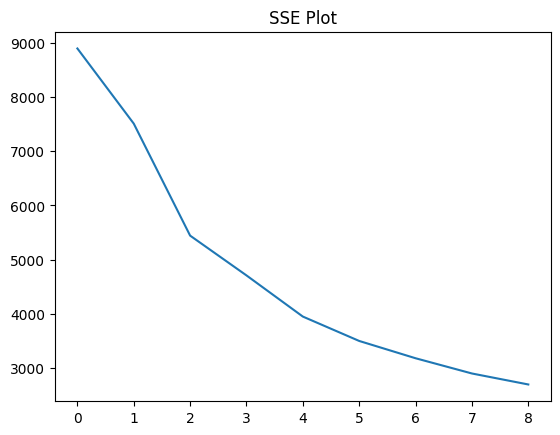

In [57]:
# getting the right number of clusters using elbow curve

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(rfm_normalized)
    sse.append(kmeans.inertia_)

# plot for sse for each n_clusters
plt.plot(sse)
plt.title('SSE Plot')

> Optimal n_clusters: The "elbow" seems to occur at around 3 or 4 clusters. This means that choosing 3 or 4 clusters might be the optimal number, as beyond this point, adding more clusters results in only marginal gains (a small decrease in SSE).

### **3.3.2 Silhouette Score**

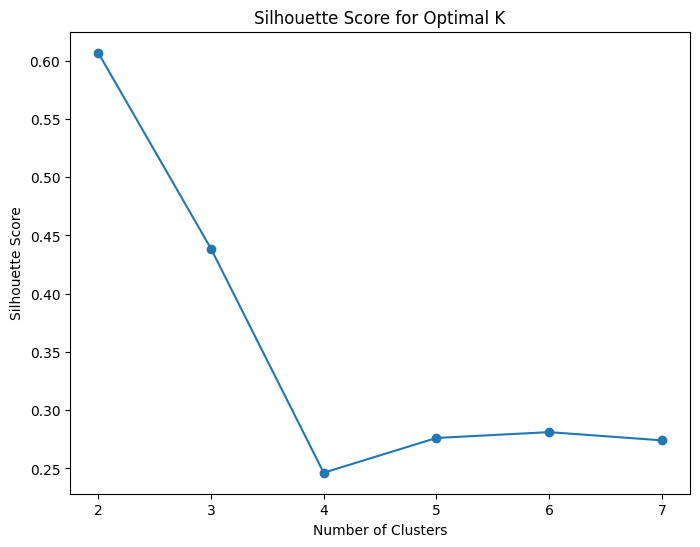

In [58]:
# silhoutte method

silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    cluster_labels = kmeans.fit_predict(rfm_normalized)
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


> Based on the Silhouette Score, 2 clusters seem to be the optimal choice, as it provides the highest score, means that the clustering solution is the most distinct and well-separated when using 2 clusters.

> Both methods provide insights from different angles:
- Silhouette Score focuses on the quality of clustering.
- SSE/Elbow Method focuses on the efficiency of clustering.

> Given this, we chose **3 clusters** for the next segmentation based on efficiency.

In [59]:
model = KMeans(n_clusters=3, random_state=RANDOM_STATE)
model.fit(rfm_normalized)
model.labels_.shape
rfm_normalized["Cluster"] = model.labels_
rfm_normalized.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1).sort_values(by=('Monetary','mean'), ascending=False)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
1          0.10      0.10     5.70   239
2          0.10     -0.00     2.00  1023
0          0.10      0.00    -0.10  5220

In [60]:
model = KMeans(n_clusters=3, random_state=RANDOM_STATE)
model.fit(rfm_df_scaled)
model.labels_.shape
rfm_df_scaled["Cluster"] = model.labels_

rfm_df_scaled.groupby('Cluster').agg({
    'Months Since Last Claim':['mean', 'min', 'max'],
    'Months Since Policy Inception': ['mean', 'min', 'max'],
    'Customer Lifetime Value':['mean', 'min', 'max', 'count']}).round(1).sort_values(by=('Customer Lifetime Value','mean'), ascending=False)

Months Since Last Claim         Months Since Policy Inception          \
                           mean min max                          mean min max   
Cluster                                                                         
1                         15.30   0  35                         51.30   0  99   
2                         15.40   0  35                         46.80   0  99   
0                         15.20   0  35                         48.00   0  99   

        Customer Lifetime Value                          
                           mean      min      max count  
Cluster                                                  
1                      33790.50 24610.80 83325.40   241  
2                      15383.50 10359.00 24543.20  1026  
0                       5364.80  1898.00 10357.60  5215

**Cluster Analysis:**

1. **Cluster 0: Established Customers with Moderate Lifetime Value**
   - **Months Since Last Claim:** Average of 15.2 months (range: 0 to 35 months)
   - **Months Since Policy Inception:** Average of 48.0 months (range: 0 to 99 months)
   - **Customer Lifetime Value:** Average of \$5,364 (range: \$1,898 to \$10,357)
   - **Number of Customers:** 5,215

    ** **
   This cluster consists of long-term customers who have been with the company for approximately 4 years. Their recent claims suggest ongoing engagement, but their lifetime value is relatively low compared to other clusters. These customers represent a significant portion of the customer base, and strategies could be developed to enhance their engagement and increase their lifetime value.

2. **Cluster 1: High-Value, Long-Term Customers**
   - **Months Since Last Claim:** Average of 15.3 months (range: 0 to 35 months)
   - **Months Since Policy Inception:** Average of 51.3 months (range: 0 to 99 months)
   - **Customer Lifetime Value:** Average of \$33,790 (range: \$24,610 to \$83,325)
   - **Number of Customers:** 241

   ** **
   This cluster is characterized by customers with high lifetime value, having been with the company for around 4.5 years. Despite having a similar claims history to other clusters, their substantial lifetime value highlights their importance. This group represents the highest revenue potential, necessitating targeted retention strategies and personalized engagement efforts to maintain their satisfaction and loyalty.

3. **Cluster 2: Moderately Valuable and Engaged Customers**
   - **Months Since Last Claim:** Average of 15.4 months (range: 0 to 35 months)
   - **Months Since Policy Inception:** Average of 46.8 months (range: 0 to 99 months)
   - **Customer Lifetime Value:** Average of \$15,538 (range: \$10,359 to \$24,543)
   - **Number of Customers:** 1,026

   ** **
   Customers in this cluster show moderate lifetime value and have been customers for about 4 years. They have similar claims behavior to other groups but with less financial contribution compared to Cluster 1. This segment has potential for growth; targeted initiatives could enhance their value and move them towards higher profitability.


 **For Short**

- **Cluster 0:** Represents a large base of long-term customers with moderate value. Strategies should focus on increasing engagement and potentially boosting their lifetime value.
- **Cluster 1:** Comprises high-value, long-term customers critical to revenue. Prioritizing their retention through personalized service is essential.
- **Cluster 2:** Includes customers with moderate value who are engaged. There is an opportunity to increase their lifetime value with targeted growth initiatives.


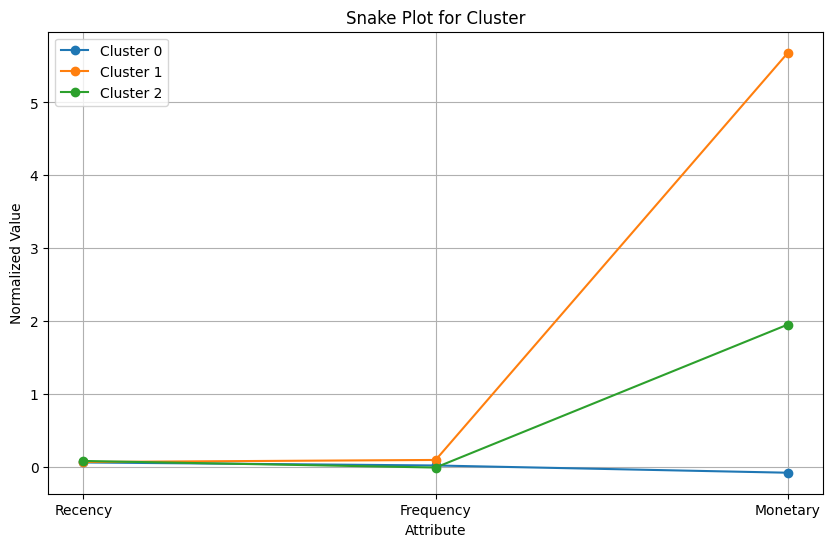

In [61]:
# Visualization using snake plot for cluster

df_mean = rfm_normalized.groupby('Cluster').mean().reset_index()
df_melted = pd.melt(df_mean, id_vars=['Cluster'], var_name='Attribute', value_name='Value')

plt.figure(figsize=(10, 6))
for cluster in df_melted['Cluster'].unique():
    subset = df_melted[df_melted['Cluster'] == cluster]
    plt.plot(subset['Attribute'], subset['Value'], marker='o', label=f'Cluster {cluster}')
plt.title('Snake Plot for Cluster')
plt.xlabel('Attribute')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()


### **3.3.3 Clustering**

In [62]:
# Final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(rfm_normalized)

KMeans(n_clusters=3)

In [63]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
set(kmeans.labels_)

{0, 1, 2}

In [65]:
kmeans.predict(rfm_normalized)

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
rfm_df_scaled['Cluster'] = kmeans.predict(rfm_normalized)
rfm_df_scaled['Cluster'] = rfm_df_scaled['Cluster'].map({
    0: 'Low-Customer',
    1: 'Top-Customer',
    2: 'Medium-Customer'})
rfm_df_scaled.head(10)

,Months Since Last Claim,Months Since Policy Inception,Customer Lifetime Value,Cluster
3773,29,60,7809.86,Top-Customer
415,7,34,3726.73,Top-Customer
6465,17,6,2676.95,Top-Customer
2323,20,3,8430.06,Top-Customer
1826,3,33,4645.84,Top-Customer
7179,9,38,5308.29,Top-Customer
5530,18,48,9807.83,Top-Customer
2623,0,74,7796.00,Top-Customer
6589,13,34,4758.19,Top-Customer
5818,12,25,12472.12,Medium-Customer


> Including the `Cluster` column will assign a segmentation label to each customer.

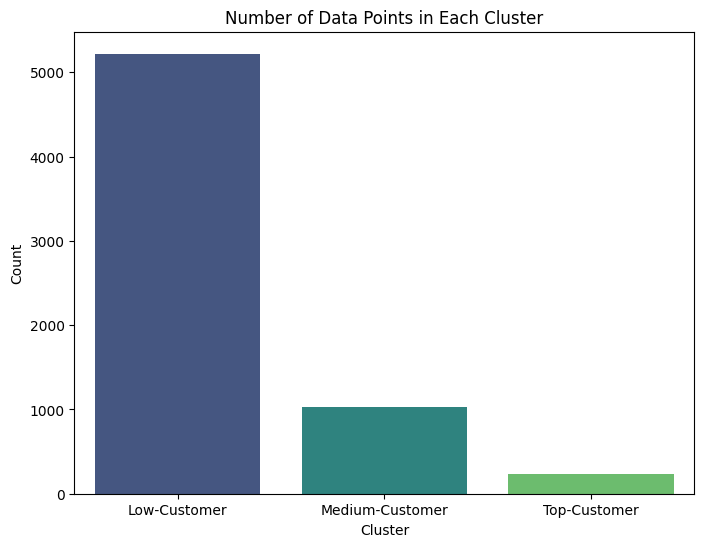

In [67]:
# Count the number of data points in each cluster

rfm_normalized['Cluster'] = rfm_normalized['Cluster'].map({
    0: 'Low-Customer',
    1: 'Top-Customer',
    2: 'Medium-Customer'})
cluster_counts = rfm_normalized['Cluster'].value_counts()

# VIsualization for each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(ticks=cluster_counts.index)
plt.show()


In [68]:
cluster_counts

Cluster
Low-Customer       5220
Medium-Customer    1023
Top-Customer        239
Name: count, dtype: int64

> The customer base is segmented into three clusters. **Cluster 0** is the largest group with 5,220 customers, representing a significant portion of the data. **Cluster 2** follows with 1,023 customers, making it the second largest segment. **Cluster 1** is the smallest, with only 239 customers. This distribution highlights that Clusters 0 and 2 encompass the majority of customers, while Cluster 1 represents a smaller, but potentially high-value segment.


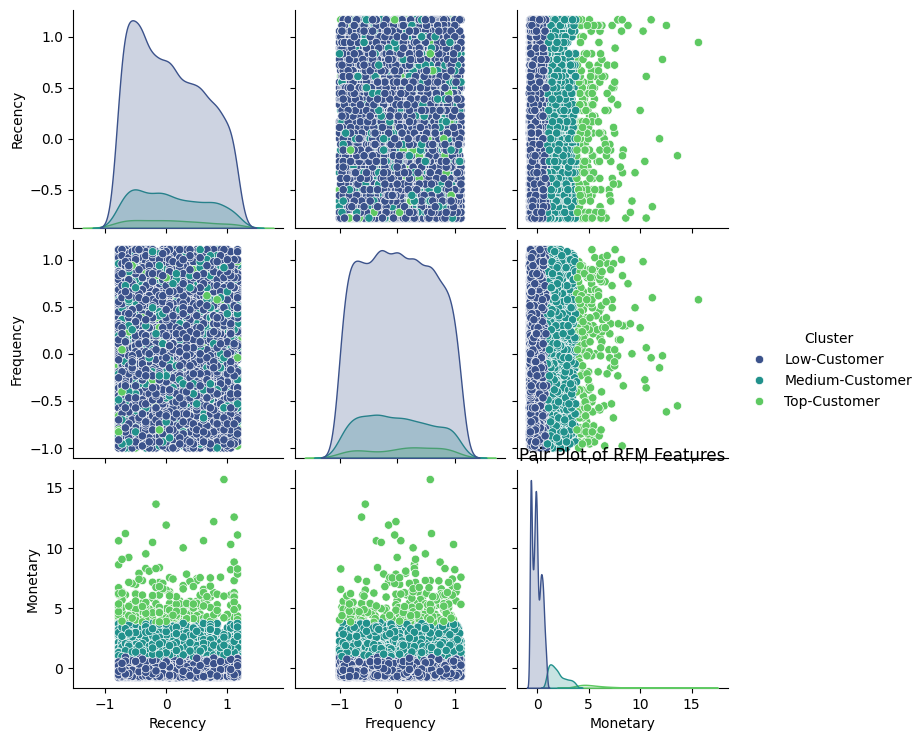

In [69]:
# Pairplot Distribution
sns.pairplot(rfm_normalized, hue='Cluster', palette='viridis', diag_kind='kde')
plt.title('Pair Plot of RFM Features')
plt.show()


> **RFM (Recency, Frequency, Monetary)** features across different customer clusters (0, 1, and 2) shows that **Cluster 0 (purple)** generally includes customers with higher Frequency and Monetary values, indicating they are frequent buyers with higher spending. **Cluster 1 (green)** shows customers with higher Recency but lower Frequency and Monetary values, suggesting these customers have shopped recently but with lower purchase frequency and spending. **Cluster 2 (yellow)** contains customers with lower Recency, Frequency, and Monetary values, which may indicate less engagement and lower value.

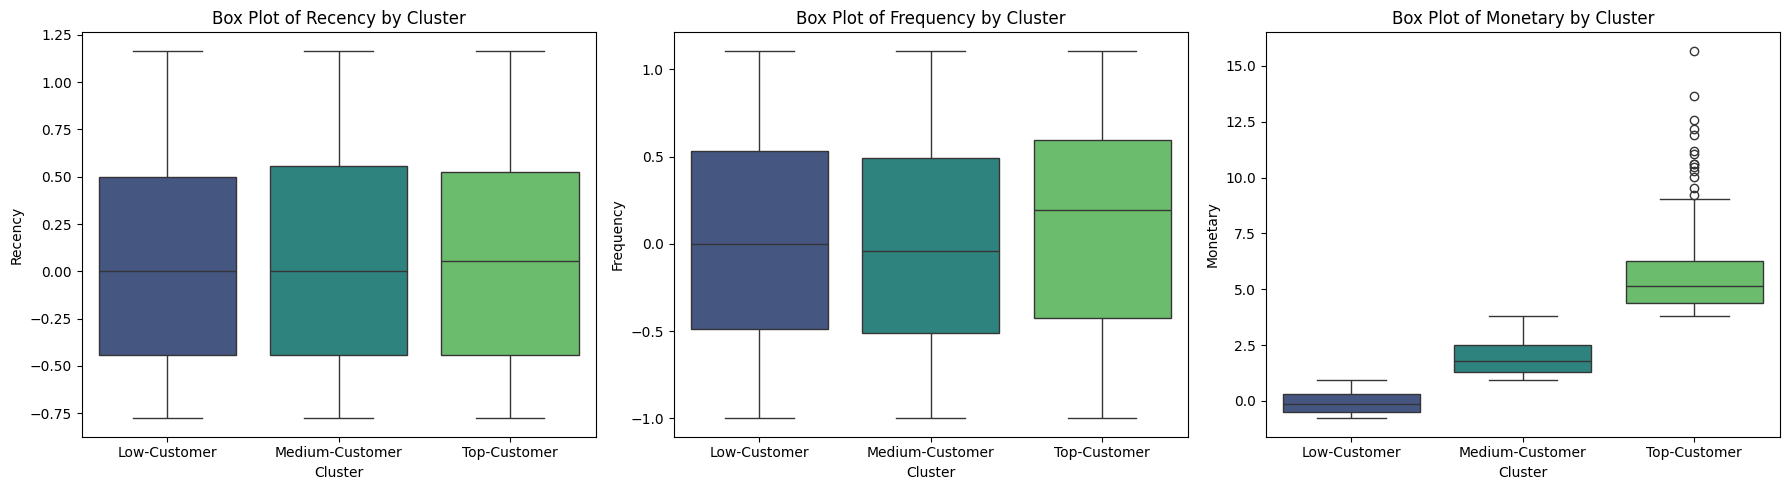

In [70]:
# Distribution of Recency, Frequency, and Monetary features by cluster using BoxPlot
plt.figure(figsize=(18, 5))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=rfm_normalized, palette='viridis')
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


>  **Cluster 0 (blue)** generally represents customers with relatively recent interactions but lower frequency and monetary spending. **Cluster 1 (green)** exhibits high frequency and highest monetary values, indicating more frequent and valuable customers, though recency is moderate. **Cluster 2 (yellow)** shows a mix of lower recency and frequency, with the moderate monetary values, suggesting fewer but high-value interactions.

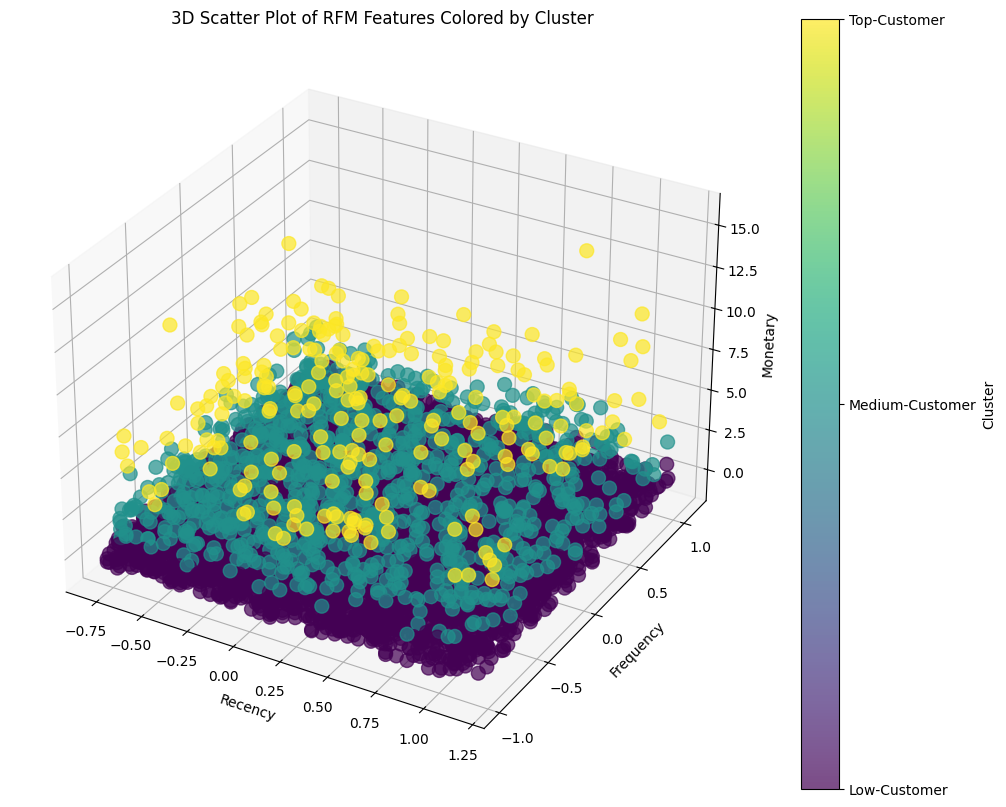

In [71]:
rfm_normalized['Cluster_Num'] = rfm_normalized['Cluster'].astype('category').cat.codes

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    rfm_normalized['Recency'],
    rfm_normalized['Frequency'],
    rfm_normalized['Monetary'],
    c=rfm_normalized['Cluster_Num'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
cbar.set_ticks(np.arange(len(rfm_normalized['Cluster'].astype('category').cat.categories)))
cbar.set_ticklabels(rfm_normalized['Cluster'].astype('category').cat.categories)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of RFM Features Colored by Cluster')

plt.show()


> **Cluster 0 (purple)** appears to be concentrated towards the lower end of the Monetary axis, suggesting that these customers generally have lower spending, and possibly lower frequency, though their recency varies. **Cluster 1 (yellow)** is spread widely across the middle of the plot, indicating a moderate recency, frequency, and monetary value distribution, likely representing more stable customers with consistent but not outstanding spending behavior. **Cluster 2 (green)** is more dispersed across the higher ends of the axes, which might imply a mix of high-frequency and high-monetary value customers.

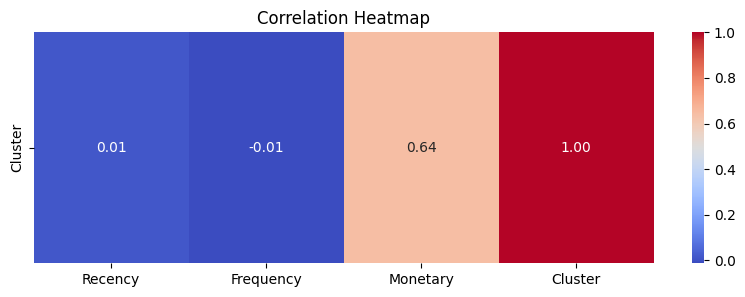

In [72]:
rfm_normalized.drop('Cluster_Num', inplace=True, axis=1)
rfm_normalized['Cluster'] = rfm_normalized['Cluster'].map({
    'Low-Customer': 0,
    'Top-Customer': 1,
    'Medium-Customer': 2})

matrix_corr = rfm_normalized.corr()

plt.figure(figsize=(10, 3))
sns.heatmap(matrix_corr.tail(1), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [73]:
matrix_corr

,Recency,Frequency,Monetary,Cluster
Recency,1.00,-0.04,0.02,0.01
Frequency,-0.04,1.00,0.02,-0.01
Monetary,0.02,0.02,1.00,0.64
Cluster,0.01,-0.01,0.64,1.00


> **Monetary** values have a strong positive relationship with the **Cluster** variable, with a correlation coefficient of 0.642. In contrast, **Recency** and **Frequency** show minimal correlation with the **Cluster** variable, suggesting that the timing of interactions and the frequency of engagements are less relevant to the classification of cluster. We can highlights that **Monetary** value is the primary driver in defining the cluster

### **3.3.1 KPI Customer Improvements**

In [75]:
df_kpi = df.copy()
df_kpi.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3773,MP13698,Oregon,7809.86,No,Premium,College,2011-01-29,Unemployed,F,32306.50,Suburban,Single,111,29,60,0,3,Personal Auto,Personal L1,Offer2,Agent,532.80,Two-Door Car,Medsize
415,ZF84449,Oregon,3726.73,No,Basic,College,2011-02-26,Unemployed,F,32306.50,Suburban,Single,112,7,34,1,1,Special Auto,Special L1,Offer1,Agent,806.40,Sports Car,Medsize
6465,OZ47099,Arizona,2676.95,No,Basic,Master,2011-01-24,Unemployed,M,32306.50,Suburban,Married,71,17,6,0,1,Corporate Auto,Corporate L3,Offer4,Branch,340.80,Four-Door Car,Medsize
2323,KM52241,Arizona,8430.06,No,Basic,High School or Below,2011-04-02,Unemployed,F,32306.50,Rural,Married,74,20,3,0,2,Personal Auto,Personal L1,Offer1,Branch,47.50,Four-Door Car,Medsize
1826,WH11924,Washington,4645.84,No,Basic,College,2011-05-02,Unemployed,M,32306.50,Suburban,Single,71,3,33,0,3,Personal Auto,Personal L2,Offer4,Web,697.19,Two-Door Car,Large


In [81]:
# Top customer KPI

df_kpi_product_top = df_kpi[(df_kpi['Customer Lifetime Value'] > 24610.80) & (df_kpi['Customer Lifetime Value'] < 83325.4) & (df_kpi['Response'] == 'Yes')]
calculate_percentage_pivot(df_kpi_product_top, ['Coverage', 'Policy Type','Vehicle Class' , 'Sales Channel', 'Number of Policies', 'Renew Offer Type'], 'Customer Lifetime Value').head(10)

,Coverage,Policy Type,Vehicle Class,Sales Channel,Number of Policies,Renew Offer Type,Customer Lifetime Value,Percentage
4,Basic,Personal Auto,Sports Car,Agent,2,Offer2,173056.89,16.30
12,Premium,Personal Auto,Four-Door Car,Call Center,2,Offer1,167151.61,15.74
3,Basic,Personal Auto,SUV,Web,2,Offer1,133893.40,12.61
2,Basic,Personal Auto,SUV,Branch,2,Offer1,104789.66,9.87
6,Extended,Corporate Auto,Four-Door Car,Web,2,Offer2,83369.08,7.85
10,Extended,Personal Auto,Luxury Car,Branch,2,Offer1,77421.19,7.29
5,Extended,Corporate Auto,Four-Door Car,Branch,2,Offer1,76394.46,7.20
9,Extended,Personal Auto,Four-Door Car,Web,2,Offer2,55579.38,5.24
7,Extended,Corporate Auto,Luxury Car,Branch,2,Offer1,51614.13,4.86
8,Extended,Personal Auto,Four-Door Car,Branch,2,Offer1,50929.64,4.80


The performance's of **Top Customers** shows that **personal auto insurance**, especially those for **sports cars and SUVs**, have a large concentration of high Customer Lifetime Value (CLV), with sales primarily coming from **agents** and **branches**. Also shown that most of the high value customers have an **extended coverage** plan for their insurance. Sports cars owner sold by agents have the greatest CLV, making up 16.30% of the overall CLV. Four-door cars and SUVs sold through a variety of channels come in second and third, respectively. There is a big impact from offers; "**Offer1**" is more common and produces more value than "Offer2."

In [82]:
# Middle customer KPI 	

df_kpi_product_middle = df_kpi[(df_kpi['Customer Lifetime Value'] > 10359.00) & (df_kpi['Customer Lifetime Value'] < 24543.20) & (df_kpi['Response'] == 'Yes')]
calculate_percentage_pivot(df_kpi_product_middle, ['Coverage', 'Policy Type', 'Vehicle Class', 'Sales Channel', 'Number of Policies', 'Renew Offer Type'], 'Customer Lifetime Value').head(10)

,Coverage,Policy Type,Vehicle Class,Sales Channel,Number of Policies,Renew Offer Type,Customer Lifetime Value,Percentage
20,Basic,Personal Auto,SUV,Branch,2,Offer1,239053.93,8.15
56,Premium,Personal Auto,Four-Door Car,Agent,2,Offer1,152271.94,5.19
13,Basic,Personal Auto,Four-Door Car,Agent,2,Offer1,138372.16,4.72
26,Basic,Personal Auto,Two-Door Car,Agent,2,Offer2,124561.59,4.25
25,Basic,Personal Auto,Two-Door Car,Agent,2,Offer1,117918.03,4.02
18,Basic,Personal Auto,SUV,Agent,2,Offer1,116820.48,3.98
15,Basic,Personal Auto,Four-Door Car,Agent,2,Offer3,94378.72,3.22
16,Basic,Personal Auto,Four-Door Car,Branch,2,Offer1,90634.15,3.09
35,Extended,Corporate Auto,Four-Door Car,Branch,2,Offer2,89329.76,3.04
60,Premium,Personal Auto,SUV,Web,8,Offer1,82416.79,2.81


The performance analysis of the **middle customer** segment shows that the majority of high Customer Lifetime Value (CLV) is generated by **personal auto policies** and have a **basic coverage** plan, with **agents** being the primary channel. Particularly, the largest CLV of 35.35% of the total CLV for this category, is contributed by policies sold through agents. While call centers and web channels provide smaller but still significant contributions to the total CLV, branch sales also contribute significantly, accounting for 13.71% of the total. **Personal vehicle** policies tend to be the most common, but corporate auto policies especially those offered through branches and agents contribute significantly.

----

# **4. Data Analysis Summary**

## **4.1 Answers from Problem Statements and Recommendations**

**1. Most Valuable Customers:**
   - **Cluster 1 (Top Customers)** are the most valuable, characterized by a high Customer Lifetime Value (CLV) and long-term engagement. They contribute significantly to the company's revenue and are prioritized for retention.
   - **Cluster 2 (Middle Customers)** also represent significant value with moderate CLV. Although not as high as Cluster 1, they offer considerable potential for increased profitability through targeted strategies.

**2. Characteristics and Engagement Enhancement for Top Customers:**
   - **Characteristics:** Top customers, as identified in **Cluster 1**, typically have a high lifetime value, are long-term customers, has an extended coverage plan and have been with the company for a significant period (around 4.5 years). They also tend to have similar claims behavior to other clusters but contribute substantially in terms of revenue.
   - **Preserving Loyality Engagement:**

      1. **Personalize Service:**
        - **Customized Offers:** Give rewards for extended coverage to preserve the high value customer loyalty.
        - **Behavior-Based Adjustments Recommendations:** Adjust customer services to suite better with customers that holds corporate auto insurance and for customers that have a sports or luxury cars.
        - **Improve Sales Channel Quality**: Improving the branch insurance company environment to enhance customers purchasing experience and ease of use for the web channel to enhance customers satisfaction.
      2. **Communicate Regularly:**
        - **Segment-Specific Communication:** Customize communication strategies based on customer preferences and needs.
        - **Insight-Driven Recommendations:** Recommend relevant products or policy adjustments using customer data.
        - **Feedback Integration:** Use customer feedback to refine and improve customers relationship.
      3. **Offer Exclusive Programs:**
        - **Special Access and Discounts:** Provide early access to products, special renewal rates, or unique benefits.
        - **Loyalty Rewards:** Implement rewards programs based on customer engagement and tenure.
        - **Adjusted Experiences:** Offer personalized services or enhanced support for top customers.

**3. Resource Allocation to Maximize CLV:**
   - **Prioritize High-Value Segments:** Allocate resources to **Cluster 1 (Top Customers)** and **Cluster 2 (Middle Customers)**, focusing on strategies to enhance their lifetime value.
   - **Offer long term plan:** Since the mid cusotmers majority holds basic coverage. Give discount and exclusive offer to upgrade their coverage to premium or extended to preserve them for long term.
   - **Support Preferred Channels:** Given the significant role of **agents** in handling high CLV policies, invest in agent training and incentives. Ensure that **Offer1** is highlighted across all channels, particularly through agents and branches.
   - **Optimize Offer Visibility:** Promote **Offer1** more prominently in **web** and **call center** channels to increase its impact.
   - **Boost Engagement for Lower-Value Segments:** Introduce loyalty programs and promotional offers for **Cluster 0 (Lower Customers)** to elevate their engagement and lifetime value.

## **4.2 Forecasting Revenue from Potential Customers**

To keep the company stable and growing, it’s vital to focus on keeping these high-value customers around. By retaining them, they need to ensure a steady flow of income and reduce the risk of losing valuable revenue. Using machine learning, company can find the best ways to engage these customers, and this is an example prediction if company retain this potential customer!


**Revenue Calculation from Customer Clusters**
- **Cluster 1**: 239 customers
- **Cluster 2**: 1,023 customers
- **Median Monthly Fee**: $83

1. **Cluster 1**:
   - Number of customers: 239
   - Monthly fee per customer: $83
   - Annual revenue from Cluster 1:
     ```python
     Calculation:
       239 * $83 * 12  = $238,716
     ```
     

2. **Cluster 2**:
   - Number of customers: 1,023
   - Monthly fee per customer: $83
   - Annual revenue from Cluster 2:
     ```python
     Calculation:
       1023 * $83 * 12  = $1,016,028
     ```

3. **Total Annual Revenue Prediction**:
      ```python
      $238,716 + $1,016,028 = $1,254,744
      ```

To conclude, if every potential customer with a monthly fee of \$83 renews their policy, it could result in an annual revenue of more than \$1.25 million. So, it's important to invest in strategies that make them want to stay and keep bringing in that steady income.

----

# **5. Building Machine Learning Model**

**Background:** 

The primary goal of this machine learning project is to predict the Customer Lifetime Value (CLV) for midmarket customers of an auto insurance company. CLV prediction will enable the company to anticipate the future value associated with each customer, aiding in strategic decision-making and resource allocation to hopefully enhance the midmarket customer to give more value to the company in the future.

**Understanding CLV empowers the company to:**

1. **Enhance Customer Segmentation:** By categorizing customers based on their predicted CLV, the company can tailor marketing campaigns, product offerings, and customer service to align with the specific needs and value of each segment.

2. **Optimize Resource Allocation:** With insights into future customer value, the company can allocate resources more efficiently, focusing on high-value customers for retention efforts, while developing strategies to increase the value of midmarket customers.

3. **Improve Customer Experience:** By understanding purchasing behavior and the factors contributing to high CLV, the company can design targeted initiatives that improve customer satisfaction, loyalty, and long-term relationships.

4. **Inform Strategic Decision-Making:** Predicting CLV provides a data-driven foundation for making strategic decisions related to pricing, and product development ultimately driving business growth and profitability.

This project will not only help in maximizing revenue but also in building stronger, long-lasting relationships with customers by offering them more relevant and personalized experiences.

**Evaluation Metrics:**

- **Mean Absolute Percentage Error (MAPE)**

The Mean Absolute Percentage Error (MAPE) is a key metric used in regression tasks to evaluate model accuracy by quantifying the average percentage difference between predicted and actual values. It provides an intuitive measure of prediction accuracy, expressed as a percentage, making it easy to interpret. A lower MAPE indicates a more accurate model, with predictions closely aligning to actual values, while a higher MAPE suggests greater deviation. Due to its scale-independent nature, MAPE is widely applicable across different datasets, though it is important to note its limitations, such as potential bias and issues with zero actual values.

MAPE Formula:

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100
$$

- **Adjusted R2**

Adjusted R-squared is a modified version of the R-squared metric used to evaluate the goodness of fit of a regression model. Like R-squared, it measures the proportion of variance in the dependent variable (CLV in our case) that is explained by the independent variables (features). However, adjusted R-squared takes into account the number of predictors in the model, penalizing the addition of unnecessary variables that might not significantly improve the model's explanatory power.

Adjusted R2 Formula:

$$
\text{Adjusted } R^2 = 1 - \left[ \frac{(1 - R^2) \times (n - 1)}{n - k - 1} \right]
$$

## **5.1 Import Libraries**

In [83]:
# Machine Learning Libraries
import sklearn
from sklearn.preprocessing import (RobustScaler,
    OneHotEncoder, OrdinalEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split, cross_val_score, KFold)
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    r2_score, mean_absolute_error,
    mean_absolute_percentage_error)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor)
from xgboost.sklearn import XGBRegressor
import shap
from skopt import BayesSearchCV

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# another libraries
import pickle
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
RANDOM_STATE = 2024

## **5.2 Data Preprocessing**

In [84]:
# Dropping unnecassary column
df.drop(columns=["Customer", "Effective To Date"], axis=1, inplace=True)

In [86]:
# Check number of duplicates
duplicate_data = df.duplicated(subset="Customer Lifetime Value", keep = "first").sum()
print(f'Found {duplicate_data} of duplicated data.')

Found 827 of duplicated data.


In [87]:
# Removing duplicates
df = df.drop_duplicates(subset="Customer Lifetime Value", keep = "first")
df.shape

(6480, 22)

In [91]:
calculate_outliers(df, "Customer Lifetime Value")
print(f'Found {outliers_result.shape[0]} of duplicate data in Customer Lifetime Value data, with the upper bound of {upper_bound}.')

Found 590 of duplicate data in Customer Lifetime Value data, with the upper bound of 16336.0242175.


In [92]:
# Removing outliers
df = df[df["Customer Lifetime Value"] <= upper_bound].copy()
df.shape

(5890, 22)

>**Outlier Decision:**
<br>
Removing outliers to improve the performance to predict the midmarket customers and some high value customers. Aligning with the business goals to improve the retantion rate by focusing on midmarket customers and high value customers. The model will have a limitation that good to predict the CLV value within the range of the target train data.

In [93]:
# Define transformer for ease of preprocessing phase
onehot_column = ['State', 'Response', 'Coverage', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size']
vehicle_class_categories = ['Four-Door Car', 'Two-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car']
education_categories = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), onehot_column),
    ('ordinal', OrdinalEncoder(categories=[vehicle_class_categories, education_categories]), ['Vehicle Class', 'Education'])
], remainder="passthrough")

> The code applies a `ColumnTransformer` to preprocess the dataset efficiently for analysis. It begins by using one-hot encoding on categorical columns like `State`, `Response`, and `Gender`, excluding the first category to avoid multicollinearity. At the same time, it applies ordinal encoding to the `Vehicle Class` and `Education` columns, assigning them ranks based on predefined categories such as `Four-Door Car` and `SUv`.

## **5.3 OLS**

In [95]:
cat_col = []
num_col = []
for column in df.columns:
    if df[column].dtype == object:
        cat_col.append(column)
    else:
        num_col.append(column)

display(cat_col, num_col)

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [96]:
catdf = df[cat_col]
# one hot encoding for categorical features
catdf = pd.get_dummies(catdf, drop_first=True, dtype=int)
catdf.head(1)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
3773,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [98]:
numdf = df[num_col]
df_ols = pd.concat([catdf, numdf], axis=1)
df_ols.head(2)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
3773,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,7809.86,32306.50,111,29,60,0,3,532.80
415,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3726.73,32306.50,112,7,34,1,1,806.40


In [99]:
X = df_ols.drop("Customer Lifetime Value", axis=1)
y = df_ols["Customer Lifetime Value"]
ols = sm.OLS(y, sm.add_constant(X))
results = ols.fit()

print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.309
Model:                                 OLS   Adj. R-squared:                  0.303
Method:                      Least Squares   F-statistic:                     54.41
Date:                     Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                             09:14:52   Log-Likelihood:                -54887.
No. Observations:                     5890   AIC:                         1.099e+05
Df Residuals:                         5841   BIC:                         1.102e+05
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

> **OLS Summary**

1.  **Adjusted R-squared: 0.303**

A low adjusted R-square of 0.303 suggest that the linear model cannot capture the complex of the data and can only explain 30.3% of the data. Suggesting using the linear model is not a good approach in this case. So we will be continuing the machine learning model that can capture the complexity of the data such as tree base model.

2. **F-statistcs 54.41 and prob. 0.00**

The F-statistic tests the overall significance of the model. A value of 52.29, combined with the very low p-value (Prob (F-statistic) = 0.00), indicates that the model is statistically significant, meaning that at least one of the predictors is significantly related to the Customer Lifetime Value.

3. **Significant Features:**

- Coverage_Extended and Coverage_Premium: Both have positive coefficients and are statistically significant, suggesting that customers with these coverage types tend to have higher Customer Lifetime Values.

- EmploymentStatus_Employed: This variable is positively associated with Customer Lifetime Value, and the result is significant, indicating employed customers tend to have a higher lifetime value.

- Renew Offer Type_Offer2, Offer3, Offer4: All of these have negative coefficients and are statistically significant, indicating that these offer types are associated with lower Customer Lifetime Values compared to the baseline offer type.

- Monthly Premium Auto: The positive and significant coefficient suggests that higher monthly premiums are associated with higher Customer Lifetime Values.

- Number of Policies: This has a strong positive coefficient and is highly significant, indicating that customers with more policies tend to have higher lifetime values.

Text(0.5, 0, 'Residual')

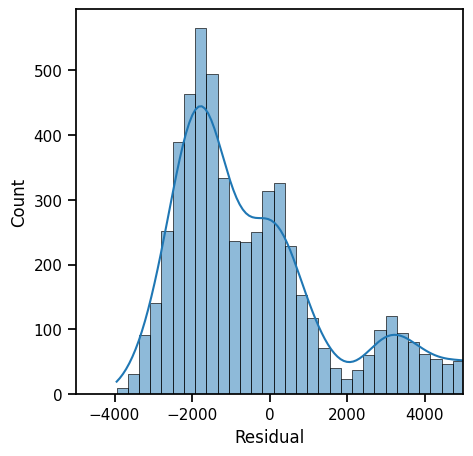

In [100]:
df_ols["y_pred"] = results.predict()
df_ols["residual"] = df_ols["Customer Lifetime Value"] - df_ols["y_pred"]
plt.figure(figsize=(5, 5))
sns.set_context("notebook", font_scale=1)
sns.histplot(df_ols["residual"], kde=True)
plt.xlim(-5000, 5000)
plt.xlabel("Residual")

In [101]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

pd.set_option('display.max_rows', None)
display(calc_vif(X))

,variables,VIF
0,State_California,2.86
1,State_Nevada,1.53
2,State_Oregon,2.48
3,State_Washington,1.45
4,Response_Yes,1.12
5,Coverage_Extended,3.10
6,Coverage_Premium,3.46
7,Education_College,1.93
8,Education_Doctor,1.14
9,Education_High School or Below,1.97


>**Feature selection decision:** In this project we have tried to drop the features that have a VIF score more than 5 that indicates multicollinearity. But the result is poor performance in the machine learning model. So we continue this machine learning model with all of the original features.


## **5.4 Modeling with Tree**

In [103]:
# Data split for ML
X = df.drop("Customer Lifetime Value", axis=1)
y = df["Customer Lifetime Value"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=RANDOM_STATE
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4712, 21), (1178, 21), (4712,), (1178,))

> Dividing the data into 4712 and 1178 within 21 features, with training data allocated to 80% and testing 20%.

In [102]:
# Model
dtree = DecisionTreeRegressor(random_state=RANDOM_STATE)
rf = RandomForestRegressor(random_state=RANDOM_STATE)
gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)
xgboost = XGBRegressor()

> Since the data isn't linear, we use a decision tree model to identify the most effective model.

In [107]:
pd.options.display.float_format = '{:.5f}'.format

In [111]:
# Tree Based Model Benchmark
# Train the data

models = [dtree, rf, gboost, xgboost]
model_name = []
mape_mean = []
mape_std = []

for model in models:

    model_pipeline = Pipeline([
        ("preprocessor", transformer),
        ("modeling", model)
    ])

    kfold = KFold(n_splits=10)
    mape_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    # Store results
    model_name.append(model.__class__.__name__)
    mape_mean.append(abs(mape_cv.mean()))
    mape_std.append(mape_cv.std())

train_score = pd.DataFrame({
'model': model_name,
'mape_train': mape_mean,
'mape_std': mape_std,
}).sort_values(by='mape_train', ascending=True)
train_score

,model,mape_train,mape_std
1,RandomForestRegressor,0.03998,0.00278
2,GradientBoostingRegressor,0.04342,0.00172
0,DecisionTreeRegressor,0.05006,0.00600
3,XGBRegressor,0.06212,0.00161


In [109]:
# Model in Testing Data

test_predict_mape = []
model_name = []

for model in models:
    model_pipeline = Pipeline([
        ("transformer", transformer),
        ("modeling", model)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred_tb = model_pipeline.predict(X_test)

    mape_result = mean_absolute_percentage_error(y_test, y_pred_tb)
    test_predict_mape.append(mape_result)

    model_name.append(model.__class__.__name__)

# Create DataFrame for results
benchmark_model_test = pd.DataFrame({
    "model": model_name,
    "mape_test": test_predict_mape
}).sort_values(by="mape_test", ascending=True)

benchmark_model_test

,model,mape_test
1,RandomForestRegressor,0.03805
2,GradientBoostingRegressor,0.04107
0,DecisionTreeRegressor,0.04770
3,XGBRegressor,0.05661


In [112]:
benchmark_model = benchmark_model_test.set_index('model').join(train_score.set_index('model'))
if 'std' in benchmark_model.columns:
    benchmark_model.drop('std', axis=1, inplace=True)
benchmark_model['mape_diff'] = (benchmark_model['mape_test'] - benchmark_model['mape_train']).abs()
benchmark_model = benchmark_model.sort_values(by='mape_test', ascending=True)
benchmark_model

,mape_test,mape_train,mape_std,mape_diff
model,,,,
RandomForestRegressor,0.03805,0.03998,0.00278,0.00193
GradientBoostingRegressor,0.04107,0.04342,0.00172,0.00235
DecisionTreeRegressor,0.04770,0.05006,0.00600,0.00236
XGBRegressor,0.05661,0.06212,0.00161,0.00551


>We pick the top two best performance in the train and test data. With the smallest difference between train score and test score, Random Forest show a strong predictive power with MAPE test score of 0.038 (3% deviate from the actual target) and a reliable model with no sign of underfit or overfit problem followed by Gradient Boost model with MAPE test score of 0.041 (4% deviate from the actual target) and a reliable model with no sign of underfit or overfit problem.

## **5.5 Hyperparameter Tuning**

### **5.5.1 Random Forest**

At its core, a Random Forest is an ensemble of decision trees. Each decision tree within the forest is trained on a random subset of the data called bootstrap dataset, and a random subset of features is considered at each node during the tree's construction. This randomness helps to reduce overfitting and improve generalization performance.

**How it works:**

1. **Bootstrap Aggregation (Bagging)**: The algorithm randomly samples the training data with replacement, creating multiple bootstrap samples. In the bootstrap sample will be allowed duplicates entry that will result a data left out of the bag. Each bootstrap sample is used to train a separate decision tree.
2. **Feature Randomization**: At each node of each decision tree, only a random subset of features is considered for splitting. This helps to decorrelate the trees and further reduce overfitting.
3. **Prediction**: To make a prediction for a new data point, each decision tree in the forest provides its own prediction. The final prediction is typically the average (or sometimes the median) of all individual tree predictions.

In [113]:
# Random Forest base model
rf = RandomForestRegressor(random_state=RANDOM_STATE)

rf_pipeline = Pipeline([
    ("preprocess", transformer),
    ("model", rf)
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
R2_rf = r2_score(y_test, y_pred_rf)

n = len(y_test)
k = X_test.shape[1]
adjusted_R2_rf = 1 - ((1 - R2_rf) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Random Forest Base:")
print(f"MAPE: {mape_rf}")
print(f"Adjusted R2: {adjusted_R2_rf}")


Metrics Evaluation Random Forest Base:
MAPE: 0.0380501809428715
Adjusted R2: 0.9270698527025618


In [114]:
# Random Forest Base Model Parameter

rf_pipeline[1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

**TUNING PARAMETERS**

Tuning the hyperparameter of the random forest could improve the model ability to perform prediction, here are some key parameter will be used in the grid search validation in order to find the best performance.

1. **n_estimators: [100, 200, 300]**  
   Specifies the number of decision trees in the random forest. Increasing this number generally improves performance by averaging predictions from more trees.

2. **max_depth: [10, 20, 30, 40, 50, None]**  
   Sets the maximum depth of each decision tree. If set to None, trees are expanded until all leaves are pure or contain fewer than `min_samples_split` samples.

3. **min_samples_split: [2, 5, 10]**  
   Determines the minimum number of samples required to split an internal node.

4. **min_samples_leaf: [1, 2, 4]**  
   Defines the minimum number of samples that a leaf node must contain.

5. **bootstrap: [True, False]**  
   Indicates whether bootstrap samples (random subsets of the data) are used when building each tree.

6. **oob_score: [True, False]**  
   Allows the model to use Out-of-Bag (OOB) samples to estimate the generalization error.

7. **max_features: [1.0]**  
   Defines the number of features to consider when looking for the best split. A value of 1.0 means using all features.

8. **max_leaf_nodes: [None]**  
   Specifies the maximum number of leaf nodes in each tree. If set to None, the number of leaf nodes is unlimited.

9. **max_samples: [None]**  
   Controls the number of samples to draw from the dataset to train each tree. If set to None, all samples are used.


10. **min_impurity_decrease: [0.0]**  
    Specifies the minimum impurity decrease required to split a node. A node will not be split if the impurity decrease is below this threshold.

11. **min_weight_fraction_leaf: [0.0]**  
    Defines the minimum weighted fraction of the total weight required to be at a leaf node.

12. **ccp_alpha: [0.0]**  
    Used for pruning the trees. It represents the complexity parameter that can be used to prune the tree by removing nodes with low importance.

13. **random_state: [2024]**  
    Sets the seed for the random number generator used during tree creation and sampling, ensuring reproducibility of results.

14. **verbose: [0]**  
    Controls the verbosity of the output during the training process. A higher value provides more detailed logging.

15. **warm_start: [False]**  
    Allows the model to reuse the previous model's state and add more trees incrementally if set to True.

**Tuning with BayesSearchCV**

>To optimize the model, we can employ BayesSearchCV, an advanced hyperparameter tuning method that uses Bayesian optimization. Unlike grid search, which exhaustively searches through all combinations of hyperparameters, Bayesian optimization intelligently explores the search space, focusing on promising regions based on previous results. Using BayesSearchCV, we can efficiently find the best combination of hyperparameters for the Gradient Boosting model by evaluating fewer configurations, leading to faster convergence and better performance.

In [115]:
# Random Forest with Hyperparameter Tuning
rf = RandomForestRegressor(random_state=RANDOM_STATE)

rf_pipeline = Pipeline([
    ("preprocess", transformer),
    ("model", rf)
])

rf_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30, 40, 50],  # Added 'None'
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False],  # Added 'False' as it's in based
    'model__oob_score': [False],
    'model__max_features': [1.0],  # From based
    'model__max_leaf_nodes': [None],  # From based
    'model__max_samples': [None],  # From based
    'model__min_impurity_decrease': [0.0],  # From based
    'model__min_weight_fraction_leaf': [0.0],  # From based
    'model__ccp_alpha': [0.0],  # From based
    'model__random_state': [2024],  # From based
    'model__verbose': [0],  # From based
    'model__warm_start': [False],  # From based
}

kfold = KFold(n_splits=5)

rf_tuned = BayesSearchCV(
    estimator=rf_pipeline,
    search_spaces=rf_grid,
    scoring="neg_mean_absolute_percentage_error",
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    n_iter=15,
    error_score="raise",
    random_state = RANDOM_STATE
)

rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('onehot',
                                                                          OneHotEncoder(drop='first'),
                                                                          ['State',
                                                                           'Response',
                                                                           'Coverage',
                                                                           'EmploymentStatus',
                                                                           'Gender',
                                                                           'Location '
                                                                           'Code',
                                                                           'Marital '
                                                                           'Status',
                                                                           'Policy '
                                                                           'Type',
                                                                           'Policy',
                                                                           'Renew '
                                                                           'Offer '
                                                                           'Type',
                                                                           'Sales '
                                                                           'Ch...
                             'model__max_leaf_nodes': [None],
                             'model__max_samples': [None],
                             'model__min_impurity_decrease': [0.0],
                             'model__min_samples_leaf': [1, 2, 4],
                             'model__min_samples_split': [2, 5, 10],
                             'model__min_weight_fraction_leaf': [0.0],
                             'model__n_estimators': [100, 200, 300],
                             'model__oob_score': [False],
                             'model__random_state': [2024],
                             'model__verbose': [0],
                             'model__warm_start': [False]},
              verbose=2)

In [116]:
print(f"Best parameters: {rf_tuned.best_params_}")
print(f"Best MAPE: {rf_tuned.best_score_}")

Best parameters: OrderedDict({'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__max_depth': 10, 'model__max_features': 1.0, 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 200, 'model__oob_score': False, 'model__random_state': 2024, 'model__verbose': 0, 'model__warm_start': False})
Best MAPE: -0.03914628366597639


In [117]:
y_pred_tuned_rf = rf_tuned.best_estimator_.predict(X_test)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_tuned_rf)
R2_rf = r2_score(y_test, y_pred_tuned_rf)

n = len(y_test)
k = X_test.shape[1]
adjusted_R2_rf = 1 - ((1 - R2_rf) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Random Forest Tuned:")
print(f"MAPE: {mape_rf}")
print(f"Adjusted R2: {adjusted_R2_rf}")


Metrics Evaluation Random Forest Tuned:
MAPE: 0.03685617684593714
Adjusted R2: 0.9310052187373331


> A few pleasing improvements occurred after **fine-tuning** the **Random Forest model**. The basic model's Adjusted R-squared was 0.9270 and its Mean Absolute Percentage Error (MAPE) was 0.0380. Following parameter adjustments, the Adjusted R-squared increased to 0.9310 while the MAPE slightly decreased to 0.0368. As a result, the adjusted model explains the data more clearly and with a little bit more accuracy.

### **5.5.2 Gradient Boosting**

Gradient Boosting Regression (GBR) is a powerful machine learning technique that excels in predicting continuous variables, such as Customer Lifetime Value (CLV). It operates by combining the predictions of multiple weaker models, typically decision trees, to create a stronger overall model.

**How Gradient Boosting Regression Works**:

1. **Initial Prediction**: GBR begins with a simple model, often a single decision tree, that makes an initial prediction for the target variable.
2. **Calculating Residuals**: The differences between the actual values and the initial predictions are called residuals, representing the errors of the initial model.
3. **Building New Trees**: GBR iteratively builds new decision trees, each focusing on predicting the residuals of the previous model. The goal is to minimize these errors with each new tree.
4. **Combining Predictions**: The predictions of each new tree are combined with the previous model's predictions, using a scaling factor called the learning rate, which controls the contribution of each tree.
5. **Iteration**: Steps 2-4 are repeated for a specified number of iterations, with each new tree attempting to correct the errors of the previous models. The learning rate may be adjusted to prevent overfitting as the process progresses.
6. **Final Prediction**: The final prediction is the weighted sum of the predictions from all the trees, resulting in a more accurate and robust model.

In [118]:
# Gradient Boost base model
gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)
gb_pipeline = Pipeline([
    ("preprocess", transformer),
    ("model", gboost)
])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb)
R2_gb = r2_score(y_test, y_pred_gb)

n = len(y_test)
k = X_test.shape[1]
adjusted_R2_gb = 1 - ((1 - R2_rf) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost Base:")
print(f"MAPE: {mape_gb}")
print(f"Adjusted R2: {adjusted_R2_gb}")


Metrics Evaluation Gradient Boost Base:
MAPE: 0.041068988997689584
Adjusted R2: 0.9310052187373331


In [119]:
# Gradient Boost Base Model Parameter

gb_pipeline[1].get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 2024,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


**TUNING PARAMETERS**

1. **model__learning_rate: [0.01, 0.05, 0.1]** -
The learning rate controls the contribution of each tree to the final model. After each tree is built, its predictions are multiplied by the learning rate, and the model adjusts based on this scaled prediction.

2. **model__n_estimators: [100, 200, 300]** -
This parameter specifies the number of boosting stages (or trees) to be built. Each stage adds another tree to the ensemble.

3. **model__max_depth: [3, 4, 5, 6]** -
Max_depth limits the maximum depth of each tree in the ensemble. This helps control the model’s complexity.

4. **model__min_samples_split: [2, 5, 10]** -
This parameter sets the minimum number of samples required to split an internal node. It controls whether a node will split further or become a leaf.

5. **model__min_samples_leaf: [1, 2, 4]** -
Min_samples_leaf sets the minimum number of samples required to be at a leaf node. It ensures that each leaf has a minimum number of samples.

6. **model__subsample: [0.8, 0.9, 1.0]** -
Subsample specifies the fraction of samples used to fit each individual tree. This technique is a form of regularization.

7. **model__alpha: [0.8, 0.85, 0.9, 0.95]** -
Alpha is the regularization parameter for the loss function in the model. It controls the strength of the regularization applied to the model, helping to prevent overfitting by penalizing overly complex models.

8. **model__ccp_alpha: [0.0, 0.001, 0.01, 0.1]** -
CCP_alpha (Cost Complexity Pruning alpha) is used for pruning the tree. A higher alpha value leads to more pruning and a simpler model, which can help in reducing overfitting by removing nodes that add little predictive power.

9. **model__min_impurity_decrease: [0.0, 0.01, 0.1]** -
Min_impurity_decrease specifies the minimum decrease in impurity required to split a node. It serves as a threshold for node splits, where higher values result in fewer splits, leading to simpler trees and a lower risk of overfitting.

10. **model__validation_fraction: [0.1, 0.15, 0.2]** -
Validation_fraction determines the proportion of the training data that is set aside as validation data for early stopping. It helps to prevent overfitting by stopping the training process when performance on the validation set starts to decline.


**Tuning with BayesSearchCV**

>To optimize the model, we can employ BayesSearchCV, an advanced hyperparameter tuning method that uses Bayesian optimization. Unlike grid search, which exhaustively searches through all combinations of hyperparameters, Bayesian optimization intelligently explores the search space, focusing on promising regions based on previous results. Using BayesSearchCV, we can efficiently find the best combination of hyperparameters for the Gradient Boosting model by evaluating fewer configurations, leading to faster convergence and better performance.

In [120]:
# Gradient Boost with Hyperparameter Tuning

gboost = GradientBoostingRegressor(random_state=RANDOM_STATE)

gboost_pipeline = Pipeline([
    ("preprocess", transformer),
    ("model", gboost)
])

gb_grid = {
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__alpha': [0.8, 0.85, 0.9, 0.95],
    'model__ccp_alpha': [0.0, 0.001, 0.01, 0.1],
    'model__min_impurity_decrease': [0.0, 0.01, 0.1],
    'model__validation_fraction': [0.1, 0.15, 0.2],
}

kfold = KFold(n_splits=5)

gboost_tuned = BayesSearchCV(
    estimator=gboost_pipeline,
    search_spaces=gb_grid,
    scoring="neg_mean_absolute_percentage_error",
    cv=kfold,
    n_iter=15,
    n_jobs=-1,
    verbose=2,
    error_score="raise",
    random_state=RANDOM_STATE
)
gboost_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('onehot',
                                                                          OneHotEncoder(drop='first'),
                                                                          ['State',
                                                                           'Response',
                                                                           'Coverage',
                                                                           'EmploymentStatus',
                                                                           'Gender',
                                                                           'Location '
                                                                           'Code',
                                                                           'Marital '
                                                                           'Status',
                                                                           'Policy '
                                                                           'Type',
                                                                           'Policy',
                                                                           'Renew '
                                                                           'Offer '
                                                                           'Type',
                                                                           'Sales '
                                                                           'Ch...
              search_spaces={'model__alpha': [0.8, 0.85, 0.9, 0.95],
                             'model__ccp_alpha': [0.0, 0.001, 0.01, 0.1],
                             'model__learning_rate': [0.01, 0.05, 0.1],
                             'model__max_depth': [3, 4, 5, 6],
                             'model__min_impurity_decrease': [0.0, 0.01, 0.1],
                             'model__min_samples_leaf': [1, 2, 4],
                             'model__min_samples_split': [2, 5, 10],
                             'model__n_estimators': [100, 200, 300],
                             'model__subsample': [0.8, 0.9, 1.0],
                             'model__validation_fraction': [0.1, 0.15, 0.2]},
              verbose=2)

In [121]:
print(f"Best parameters: {gboost_tuned.best_params_}")
print(f"Best MAPE: {gboost_tuned.best_score_}")

Best parameters: OrderedDict({'model__alpha': 0.8, 'model__ccp_alpha': 0.0, 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_impurity_decrease': 0.01, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100, 'model__subsample': 1.0, 'model__validation_fraction': 0.2})
Best MAPE: -0.038921266828490654


In [122]:
y_pred_tuned_gboost = gboost_tuned.best_estimator_.predict(X_test)

mape_gb = mean_absolute_percentage_error(y_test, y_pred_tuned_gboost)
R2_gb = r2_score(y_test, y_pred_tuned_gboost)

n = len(y_test)
k = X_test.shape[1]
adjusted_R2_gb = 1 - ((1 - R2_gb) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost Tuned:")
print(f"MAPE: {mape_gb}")
print(f"Adjusted R2: {adjusted_R2_gb}")


Metrics Evaluation Gradient Boost Tuned:
MAPE: 0.03637117504835968
Adjusted R2: 0.9329126101879861


Metrics Evaluation Gradient Boost Base:
MAPE: 0.041068988997689584
Adjusted R2: 0.9310052187373331

> Following optimization, the **Gradient Boosting model** showed significant improvements from the original version. The basic model's Adjusted R-squared was 0.9310 and its Mean Absolute Percentage Error (MAPE) was 0.0410. Following adjustment, the Adjusted R-squared slightly increased to 0.9329 while the MAPE decreased to 0.0363. The changes made prove that the updated model represents the data more accurately and with a marginally better fit.

In [123]:
df_comparison = pd.DataFrame({
    "Model":["Random Forest", "Gradient Boost"],
    "MAPE":[mape_rf,mape_gb],
    "Adj-R2":[adjusted_R2_rf,adjusted_R2_gb]
})
df_comparison

,Model,MAPE,Adj-R2
0,Random Forest,0.03686,0.93101
1,Gradient Boost,0.03637,0.93291


>Both model perform well in the test data, but we finalized the model with Gradient Boost since it has slightly better score.

## **5.6 Final Model - Gradient Boost (Performance Summary)**

In [124]:
# Finalized model with gradient boost
final_model = gboost_tuned.best_estimator_

final_model.fit(X_train, y_train)
y_pred_gboost = final_model.predict(X_test)

mape_gboost = mean_absolute_percentage_error(y_test, y_pred_gboost)
R2_gboost = r2_score(y_test, y_pred_gboost)

n = len(y_test)
k = X_test.shape[1]
adjusted_R2_gboost = 1 - ((1 - R2_gboost) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost Tuned:")
print(f"MAPE: {mape_gboost}")
print(f"Adjusted R2: {adjusted_R2_gboost}")


Metrics Evaluation Gradient Boost Tuned:
MAPE: 0.03637117504835968
Adjusted R2: 0.9329126101879861


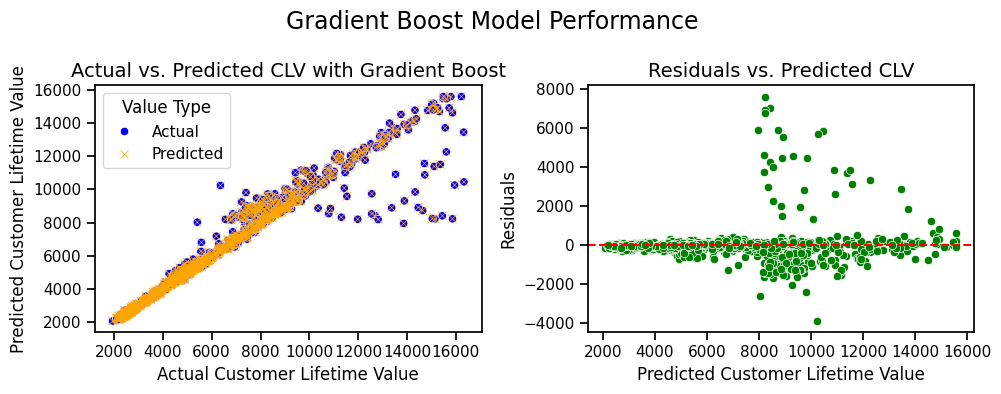

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Actual vs. Predicted CLV with color distinction
sns.scatterplot(x=y_test, y=y_pred_tuned_gboost, hue=np.repeat(["Actual"], len(y_test)), ax=axs[0], palette=["blue"])  # Actual values are blue
sns.scatterplot(x=y_test, y=y_pred_tuned_gboost, hue=np.repeat(["Predicted"], len(y_pred_tuned_gboost)), ax=axs[0], palette=["orange"], marker="x")  # Predicted are orange 'x'

axs[0].set_xlabel("Actual Customer Lifetime Value", fontsize=12)
axs[0].set_ylabel("Predicted Customer Lifetime Value", fontsize=12)
axs[0].set_title("Actual vs. Predicted CLV with Gradient Boost", fontsize=14)
axs[0].legend(title="Value Type")

# Plot 2: Residuals vs. Predicted CLV
sns.scatterplot(x=y_pred_tuned_gboost, y=y_test - y_pred_tuned_gboost, ax=axs[1], color="green")  # Residuals are green

axs[1].set_xlabel("Predicted Customer Lifetime Value", fontsize=12)
axs[1].set_ylabel("Residuals", fontsize=12)
axs[1].set_title("Residuals vs. Predicted CLV", fontsize=14)
axs[1].axhline(y=0, color='r', linestyle='dashed')  # Add a horizontal line at y=0

fig.suptitle("Gradient Boost Model Performance", size=17)
fig.tight_layout()

plt.show()

>**Summary**

The plot show a strong correlation by following a diagonal line, this means that the model correctly identifies with highes actual CLV tend to have higher predicted CLV as well. But note that the result of removing outliers the model has its limitation. If we see in the right plot of residuals of the prediction we see that starting at around 8000 CLV value the model tends to underpredict the CLV probably to the lack of training data that are above 8000 CLV.

The Gradient Boost model have a good ability to predict a midmarket customers that have a low to medium CLV value, this is crucial for the company business goal to aiding correct marketing strategies and resource allocation according to the customer segment determine by one of importance key metrics which is Customer Lifetime Value in order to increase retention rate to increase company profitability.

## **5.7 Feature Importance**

In [126]:
# Getting feature names
features = list(transformer.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append("_".join(feature.split("_")[2:]))

# assign feature importance
imp = final_model.named_steps['model'].feature_importances_

# to dataframe

feature_imp = pd.DataFrame({
    "Importance":imp,
    "Feature":list_features
}).sort_values(by="Importance", ascending=False)
feature_imp

,Importance,Feature
41,0.64982,Number of Policies
37,0.32601,Monthly Premium Auto
7,0.00485,EmploymentStatus_Employed
42,0.00361,Total Claim Amount
10,0.00284,EmploymentStatus_Unemployed
38,0.00263,Months Since Last Claim
36,0.00244,Income
40,0.00147,Number of Open Complaints
39,0.00128,Months Since Policy Inception
5,0.00125,Coverage_Extended


**Top 10 Features**

1. **Number of Policies (Importance: 0.649672)**:

This feature is the most influential in predicting Customer Lifetime Value (CLV). Customers who hold multiple policies are likely to have a higher CLV, as they are more invested in the company and generate more revenue over time.

2. **Monthly Premium Auto (Importance: 0.325436)**:

The amount a customer pays for their auto insurance premium is also a significant predictor of CLV. Higher monthly premiums likely correlate with higher coverage and, consequently, higher CLV.

3. **Income (Importance: 0.006353)**:

While less impactful than the top two features, income still plays a role in determining CLV. Higher income customers may afford more policies or higher premiums, contributing to a higher CLV.

4. **Total Claim Amount (Importance: 0.003712)**:

The total amount claimed by a customer has a slight influence on CLV. A history of large claims might reduce profitability, impacting CLV negatively, or it could indicate a long-term customer who has maintained their policies despite claims, contributing positively to CLV.

5. **EmploymentStatus_Employed (Importance: 0.003457)**:

Being employed is associated with a slightly higher CLV. Employment status may indicate financial stability, enabling customers to maintain multiple policies or higher premiums.

6. **Months Since Last Claim (Importance: 0.002236)**:

The time since the last claim is another minor factor in predicting CLV. Longer periods without claims might be indicative of lower risk customers who contribute positively to their CLV.

7. **Coverage_Extended (Importance: 0.002000)**:

Customers with extended coverage likely have higher CLVs, as they tend to purchase more comprehensive insurance products, contributing more to the company's revenue.

8. **Number of Open Complaints (Importance: 0.001539)**:

The number of open complaints has a small impact on CLV. Frequent complaints might indicate dissatisfaction and a potential risk of churn, which could lower CLV.

9. **Months Since Policy Inception (Importance: 0.001429)**:

The duration of the customer's relationship with the company, as indicated by the number of months since policy inception, also contributes slightly to CLV. Long-term customers are more likely to have a higher CLV.

10. **Marital Status_Single (Importance: 0.000778)**:

Being single has the least importance among the top ten features but still impacts CLV. Marital status could influence the types of policies a customer needs, and singles might have different insurance needs compared to married customers, affecting their CLV.


These features together help the model predict which customers are likely to have higher lifetime values, with "Number of Policies" and "Monthly Premium Auto" being the most critical factors influencing CLV.

## **5.8 Explainable A.I**

In [127]:
test_transformed = pd.DataFrame(
    final_model[0].transform(X_test)
    , columns = list_features)
test_transformed.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Class,Education,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,2.00000,32306.50000,74.00000,19.00000,50.00000,0.00000,1.00000,532.80000
1,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,2.00000,67276.00000,61.00000,7.00000,74.00000,0.00000,2.00000,181.80444
2,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000,86001.00000,109.00000,4.00000,27.00000,1.00000,1.00000,523.20000
3,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,45191.00000,69.00000,18.00000,34.00000,0.00000,1.00000,330.78293
4,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,32306.50000,65.00000,18.00000,63.00000,0.00000,1.00000,319.49223


PermutationExplainer explainer: 1179it [01:41, 10.99it/s]                          


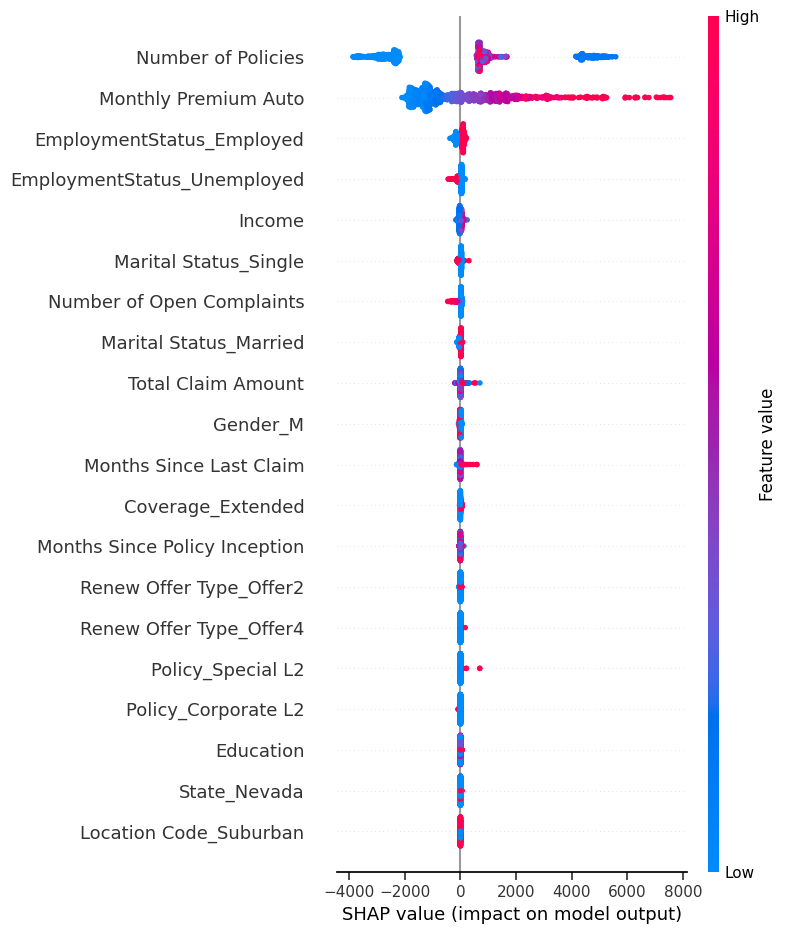

In [128]:
# Explainable AI Global

# explainer
explainer = shap.Explainer(
    final_model[-1].predict,
    final_model[0].transform(X_test)
)

shap_values = explainer(test_transformed)
shap.summary_plot(shap_values, test_transformed)

**X-Axis - Shap Values**:

The **X-axis** represents the "SHAP value," which indicates how much a particular feature affects the prediction. A positive SHAP value means the feature increases the predicted CLV, while a negative SHAP value means it decreases the predicted CLV.

**Y-Axis: Features**:

The **Y-axis** lists all the features that the model uses to make predictions. Features at the top, like "Number of Policies" and "Monthly Premium Auto," are the most important—they have the biggest impact on the prediction of CLV.

**Colors and Dots**:

Each dot on the graph represents a customer or instance. The **color** of a dot indicates whether the feature’s value is high (red) or low (blue). For example, a red dot for "Monthly Premium Auto" means that customer is paying a high premium. The **position** of the dot on the X-axis shows whether the feature increases (positive SHAP value) or decreases (negative SHAP value) the CLV for that customer.


**Insights**:
   - **"Number of Policies"**: is the most influential feature. Generally, customers with more policies tend to have a higher predicted CLV.
   - **"Monthly Premium Auto"**: Higher premiums are associated with a higher CLV, making this another crucial factor.
   - **Other Features**: Factors like "Income," "Employment Status," and "Marital Status" also influence the CLV but are less impactful compared to the top features.

----------------------------------------
Customer ID (Index): 33
Test Data: 
State                                Washington
Response                                     No
Coverage                                  Basic
Education                               College
EmploymentStatus                     Unemployed
Gender                                        F
Income                              32306.50000
Location Code                          Suburban
Marital Status                         Divorced
Monthly Premium Auto                        109
Months Since Last Claim                       5
Months Since Policy Inception                20
Number of Open Complaints                     4
Number of Policies                            7
Policy Type                      Corporate Auto
Policy                             Corporate L1
Renew Offer Type                         Offer1
Sales Channel                       Call Center
Total Claim Amount                    605.13748
Vehicle Cla

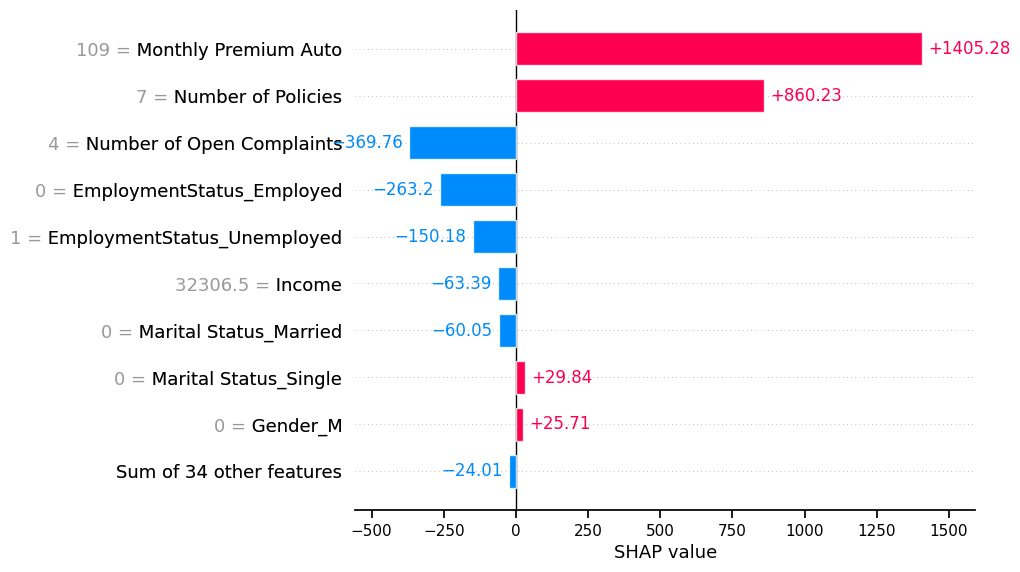

In [129]:
def combined_shap_analysis(i, final_model, X_test, y_test, X_train, list_features):
    """
    Performs and displays SHAP analysis for a given customer ID (index).

    Args:
        i (int): Customer ID (index) to analyze.
        final_model: Fitted pipeline model.
        X_test (DataFrame): Test features.
        y_test (Series): Test target labels.
        X_train (DataFrame): Training features.
        list_features (list): List of feature names.

    Returns:
        None: Displays the analysis outputs.
    """

    # 1. Test Data and Prediction
    print("-" * 40)  # Separator for readability
    print(f"Customer ID (Index): {i}")
    print(f"Test Data: \n{X_test.iloc[i]}")
    print(f"Actual CLV: {y_test.iloc[i]}")
    print(f"Predicted CLV: {final_model.predict(X_test.iloc[[i]])[0]}")
    print("-" * 40)  # Separator

    # 2. Bar Plot of SHAP Values (Training Data)
    X_train_trans = final_model[0].transform(X_train)
    X_train_preprocessed = pd.DataFrame(X_train_trans, columns=list_features)

    explainer = shap.Explainer(final_model.named_steps["model"], X_train_preprocessed)
    # shap_values = explainer(X_train_preprocessed)

    # Display bar plot for the specified customer index
    shap.plots.bar(shap_values[i])

    # 3. SHAP Force Plot (Test Data)
    X_test_trans = final_model[0].transform(X_test)
    X_test_preprocessed = pd.DataFrame(X_test_trans, columns=list_features)
    shap.initjs()
    explainer_test = shap.TreeExplainer(final_model.named_steps["model"])
    shap_values_test = explainer_test.shap_values(X_test_preprocessed)
    display(shap.force_plot(explainer_test.expected_value, shap_values_test[i], X_test_preprocessed.iloc[i]))

# Get user input for customer ID
i = input("Please enter a customer ID (index): ")

# Ensure input is a valid index
try:
    i = int(i)
    if i < 0 or i >= len(X_test):
        raise ValueError
except ValueError:
    print("Invalid customer ID (index). Please enter a valid integer within the range of your dataset.")
else:
    # Perform combined analysis
    combined_shap_analysis(i, final_model, X_test, y_test, X_train, list_features)

>The local feature importance plot above shows the model's nine most contributing features toward the CLV prediction of a given customer i. The color of each bar represents the direction of influence on the prediction. Blue bars indicate the features that have negative influence or the ones that swayed the input's prediction towards a lower value relative to the model's baseline prediction (the average CLV prediction of the model across all customers). 

>whereas red bars show the features that have positive influence or swayed the prediction towards a higher value relative to the baseline. The magnitude of influence of each feature is represented by the length of its bar, where features with longer bars have more influence in swaying the prediction towards their direction of influence compared to features with shorter bars. A total sum of the importances of the other features is also shown on the lower end of the plot. By summing up the SHAP values of a single customer, we could get a measure of how far the CLV prediction of a single customer is from the average CLV prediction of all customers and in what direction.

In [130]:
# Comparison Example
df_result = pd.DataFrame({
    "CLV Actual":round(y_test),
    "CLV Prediction":[round(a) for a in y_pred_gboost]
})
df_result.sample(10)

,CLV Actual,CLV Prediction
967,2555.00000,2586
5247,9012.00000,8793
5869,8238.00000,8215
4011,4237.00000,4323
5936,7320.00000,8329
3538,13530.00000,10908
2229,6929.00000,7048
1346,9928.00000,10137
2457,7815.00000,8143
6695,11639.00000,11632


## **5.9 Prototype Run**

In [169]:
pickle.dump(final_model, open("./CLV Predictor.pkl", "wb"))

In [170]:
clv_predictor = pickle.load(open("CLV Predictor.pkl", "rb")) # read the model

### **5.9.1 Running on Unseen Data**

In [131]:
y_unseen = df_unseen["Customer Lifetime Value"]
df_unseen = df_unseen.drop("Customer Lifetime Value", axis=1)

In [171]:
y_pred_gboost_unseen = clv_predictor.predict(df_unseen)

mape_gboost = mean_absolute_percentage_error(y_unseen, y_pred_gboost_unseen)
R2_gboost = r2_score(y_unseen, y_pred_gboost_unseen)

n = len(y_unseen)
k = df_unseen.shape[1]
adjusted_R2_gboost = 1 - ((1 - R2_gboost) * (n - 1) / (n - k - 1))

print("\nMetrics Evaluation Gradient Boost Tuned:")
print(f"MAPE: {mape_gboost}")
print(f"Adjusted R2: {adjusted_R2_gboost}")


Metrics Evaluation Gradient Boost Tuned:
MAPE: 0.07787980100317303
Adjusted R2: 0.4894171356061958


>The performance of Gradient Boosting model on unseen data is significantly worse compared to the test data. While the test data showed a low MAPE of 3.66% and a high adjusted R² of 0.93, indicating strong model performance and accuracy, the unseen data revealed a higher MAPE of 7.79% and a much lower adjusted R² of 0.49. The decrease in performance points to potential issues (unpredicted data) with the model's stability and its capacity to manage data variations it hasn't encountered during training.

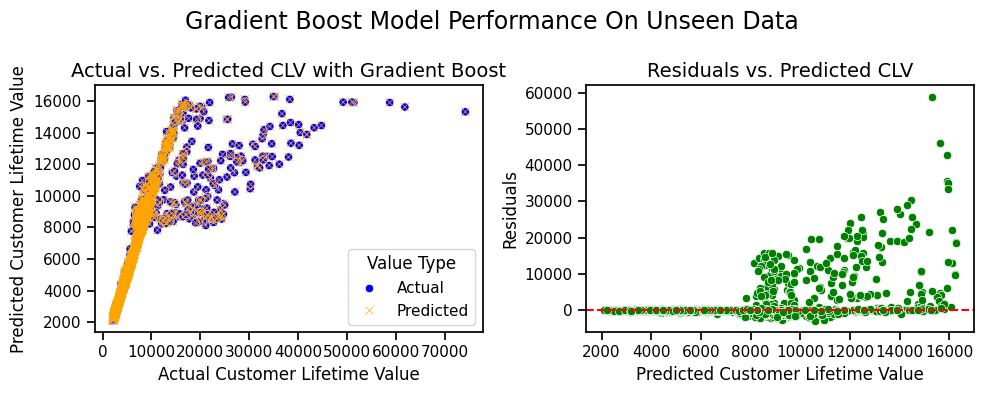

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Actual vs. Predicted CLV with color distinction
sns.scatterplot(x=y_unseen, y=y_pred_gboost_unseen, hue=np.repeat(["Actual"], len(y_unseen)), ax=axs[0], palette=["blue"])  # Actual values are blue
sns.scatterplot(x=y_unseen, y=y_pred_gboost_unseen, hue=np.repeat(["Predicted"], len(y_pred_gboost_unseen)), ax=axs[0], palette=["orange"], marker="x")  # Predicted are orange 'x'

axs[0].set_xlabel("Actual Customer Lifetime Value", fontsize=12)
axs[0].set_ylabel("Predicted Customer Lifetime Value", fontsize=12)
axs[0].set_title("Actual vs. Predicted CLV with Gradient Boost", fontsize=14)
axs[0].legend(title="Value Type")

# Plot 2: Residuals vs. Predicted CLV
sns.scatterplot(x=y_pred_gboost_unseen, y=y_unseen - y_pred_gboost_unseen, ax=axs[1], color="green")  # Residuals are green

axs[1].set_xlabel("Predicted Customer Lifetime Value", fontsize=12)
axs[1].set_ylabel("Residuals", fontsize=12)
axs[1].set_title("Residuals vs. Predicted CLV", fontsize=14)
axs[1].axhline(y=0, color='r', linestyle='dashed')  # Add a horizontal line at y=0

fig.suptitle("Gradient Boost Model Performance On Unseen Data", size=17)
fig.tight_layout()

plt.show()

In [173]:
df_new = df_unseen.copy()
df_new["Customer Lifetime Value Prediction"] = y_pred_gboost_unseen
df_new.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value Prediction
6892,SG51792,Arizona,No,Basic,Bachelor,4/2/2011,Employed,F,75277,Suburban,Married,70,2,48,3,1,Corporate Auto,Corporate L3,Offer2,Agent,459.74374,Two-Door Car,Medsize,2755.31215
3560,JE98863,Arizona,No,Extended,Bachelor,2/18/11,Employed,F,58713,Suburban,Married,98,8,4,0,1,Special Auto,Special L1,Offer1,Agent,470.40000,Four-Door Car,Small,3922.66000
5112,PC27174,Oregon,No,Premium,College,2/23/11,Unemployed,F,0,Suburban,Single,117,2,41,0,1,Personal Auto,Personal L1,Offer2,Web,842.40000,Four-Door Car,Medsize,4098.92756
6086,WW52683,California,No,Basic,Bachelor,1/26/11,Employed,F,61067,Rural,Married,64,20,0,1,3,Personal Auto,Personal L3,Offer2,Agent,86.30974,Four-Door Car,Medsize,5094.82809
1953,UR36912,California,No,Basic,Bachelor,1/31/11,Employed,M,77362,Suburban,Married,70,14,25,0,1,Personal Auto,Personal L3,Offer2,Agent,386.59980,Two-Door Car,Medsize,2842.64825


### **5.9.2 Clustering in Unseen Data**

In [133]:
df_clustering = df_unseen.copy()
df_clustering['CLV Prediction'] = y_pred_gboost_unseen
df_clustering.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Prediction
6892,SG51792,Arizona,No,Basic,Bachelor,4/2/2011,Employed,F,75277,Suburban,Married,70,2,48,3,1,Corporate Auto,Corporate L3,Offer2,Agent,459.74374,Two-Door Car,Medsize,2755.31215
3560,JE98863,Arizona,No,Extended,Bachelor,2/18/11,Employed,F,58713,Suburban,Married,98,8,4,0,1,Special Auto,Special L1,Offer1,Agent,470.40000,Four-Door Car,Small,3922.66000
5112,PC27174,Oregon,No,Premium,College,2/23/11,Unemployed,F,0,Suburban,Single,117,2,41,0,1,Personal Auto,Personal L1,Offer2,Web,842.40000,Four-Door Car,Medsize,4098.92756
6086,WW52683,California,No,Basic,Bachelor,1/26/11,Employed,F,61067,Rural,Married,64,20,0,1,3,Personal Auto,Personal L3,Offer2,Agent,86.30974,Four-Door Car,Medsize,5094.82809
1953,UR36912,California,No,Basic,Bachelor,1/31/11,Employed,M,77362,Suburban,Married,70,14,25,0,1,Personal Auto,Personal L3,Offer2,Agent,386.59980,Two-Door Car,Medsize,2842.64825


In [134]:
df_clustering["CLV Prediction"].describe()

count    1827.00000
mean     6879.30541
std      3387.92115
min      2082.00225
25%      4208.84598
50%      5970.30716
75%      8962.06811
max     16278.21503
Name: CLV Prediction, dtype: float64

In [136]:
transformer_gb = ColumnTransformer(
    transformers=[
        ("scaler", RobustScaler(), ["Months Since Last Claim", "Months Since Policy Inception", "CLV Prediction"]),
        ],
    remainder='drop'
)

pipeline_gb = Pipeline(steps=[
    ('preprocessor', transformer_gb),
    ('model', KMeans(n_clusters=3, random_state=RANDOM_STATE))
])

In [151]:
gb_transformed = pipeline_gb.named_steps['preprocessor'].fit_transform(df_clustering)
gb_transformed = pd.DataFrame(gb_transformed, columns=["Recency", "Frequency", "Monetary"])
cluster_labels = pipeline_gb.named_steps['model'].fit_predict(gb_transformed)
gb_transformed['Cluster'] = cluster_labels
gb_transformed['Cluster'] = gb_transformed['Cluster'].map({
    0: 'Medium-Customer',
    1: 'Top-Customer',
    2: 'Low-Customer'})

gb_transformed.value_counts('Cluster')

Cluster
Top-Customer       661
Low-Customer       629
Medium-Customer    537
Name: count, dtype: int64

In [152]:
gb_transformed.head(5)

,Recency,Frequency,Monetary,Cluster
0,-0.70588,0.00000,-0.67638,Low-Customer
1,-0.35294,-0.91667,-0.43079,Low-Customer
2,-0.70588,-0.14583,-0.39371,Low-Customer
3,0.35294,-1.00000,-0.18419,Medium-Customer
4,0.00000,-0.47917,-0.65801,Low-Customer


In [165]:
# RFM ANALYSIS IN UNSEEN DATA (INVERS TO ACTUAL VALUES)

original_columns = ["Months Since Last Claim", "Months Since Policy Inception", "CLV Prediction"]

scaler = RobustScaler()
scaler.fit(df_clustering[original_columns])

gb_transformed = scaler.transform(df_clustering[original_columns])
gb_transformed_df = pd.DataFrame(gb_transformed, columns=["Recency", "Frequency", "Monetary"])

kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
cluster_labels = kmeans.fit_predict(gb_transformed_df)

gb_transformed_df['Cluster'] = cluster_labels
# gb_transformed_df['Cluster'] = gb_transformed_df['Cluster'].map({
#     0: 'Medium-Customer',
#     1: 'Top-Customer',
#     2: 'Low-Customer'
# })

original_values = scaler.inverse_transform(gb_transformed_df[["Recency", "Frequency", "Monetary"]])
df_original_values = pd.DataFrame(original_values, columns=["Recency", "Frequency", "Monetary"])
df_original_values['Cluster'] = gb_transformed_df['Cluster']
df_original_values.groupby('Cluster').agg({
    'Recency':['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary':['mean', 'min', 'max', 'count']}).round(1).sort_values(by=('Monetary','mean'), ascending=False)

Recency                   Frequency                     Monetary  \
            mean      min      max      mean     min      max        mean   
Cluster                                                                     
1       12.10000  0.00000 35.00000  49.00000 0.00000 99.00000 10480.30000   
0       26.10000 13.00000 35.00000  39.60000 0.00000 99.00000  5442.00000   
2        8.40000  0.00000 23.00000  54.80000 0.00000 99.00000  4322.10000   

                                      
               min         max count  
Cluster                               
1       7385.80000 16278.20000   661  
0       2188.30000 11335.10000   537  
2       2082.00000  7911.40000   629

In [180]:
df_original_values.corr().tail(1)

,Recency,Frequency,Monetary,Cluster
Cluster,-0.69756,0.21337,-0.16958,1.00000


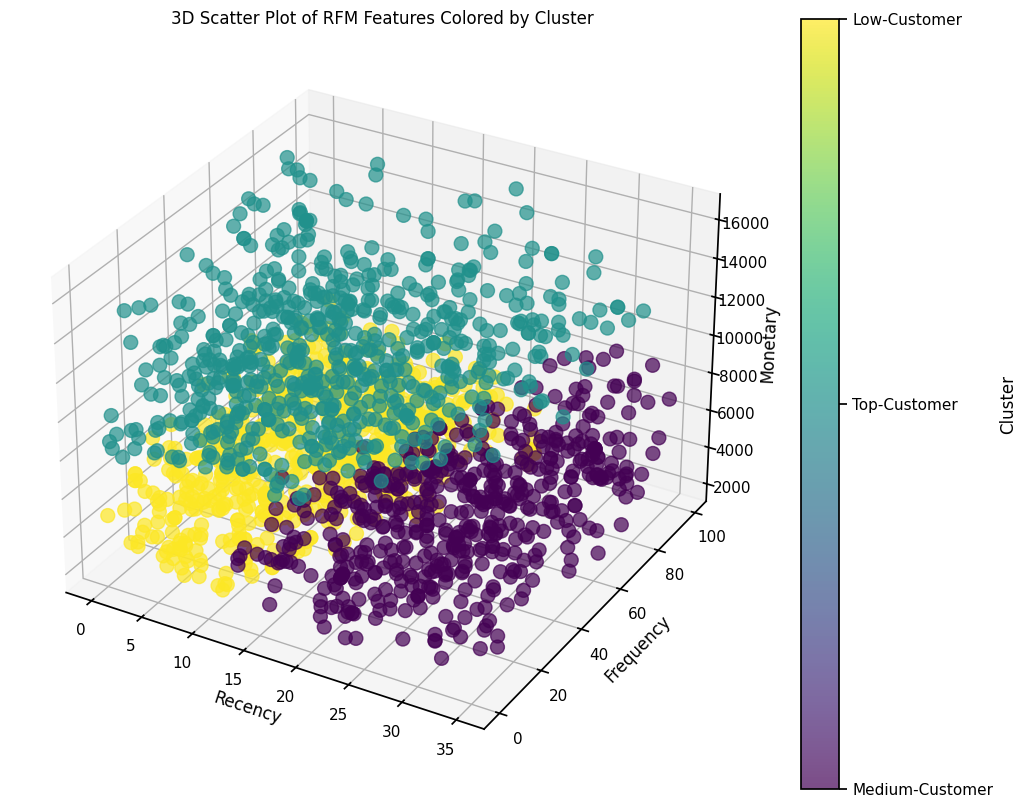

In [167]:
# Define the label mapping
label_mapping = {
    'Medium-Customer': 0,
    'Top-Customer': 1,
    'Low-Customer': 2
}

# Inverse mapping to convert numeric codes back to cluster names
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Visualization of RFM Segmentation on unseen data

df_original_values['Cluster'] = df_original_values['Cluster'].astype('category').cat.codes

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_original_values['Recency'],
    df_original_values['Frequency'],
    df_original_values['Monetary'],
    c=df_original_values['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
cbar.set_ticks(list(label_mapping.values()))  # Set ticks to match the numeric codes
cbar.set_ticklabels([inverse_label_mapping[i] for i in cbar.get_ticks()])  # Set labels to original names
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of RFM Features Colored by Cluster')

plt.show()

>There is a **visible overlap** in the unseen data, especially in the **recency** and **frequency** dimensions, however the overall clustering structure is similar. For each cluster, the unseen data shows a more wide distribution of recency and frequency values, especially among middle-class and top consumers. This implies that a wider variety of client actions that may not have been fully captured during training are encountered by the model in the unseen data. As a result, compared to the training data, the clusters appear more mixed since some consumers in the unseen data may have recent transactions but lower frequency, or high frequency with less recent transactions.

>In detail:
- *Recency*: The correlation between recency and cluster is significantly negative in the unseen data (-0.69756), contrasting with a very weak positive correlation in the training data (0.01). This indicates that the unseen data has a wider variation in recency values compared to the training data.
- *Frequency*: The correlation between frequency and cluster in the unseen data (0.21337) is positive but relatively weak compared to a very weak negative correlation in the training data (-0.01). This suggests that the frequency values in the unseen data are also more varied.
- *Monetary*: The correlation between monetary value and cluster remains positive and strong in the training data (0.64) and is weak and negative in the unseen data (-0.16958). This reflects a shift in how monetary value associates with clustering in the unseen data.


-----

# **6. Summary and Recomendation**

## **6.1 Summary**

1. The final model gradient boost with hyperparameter tuning achieved a MAPE score of 0.036 meaning the prediction deviate by 3.6% from the actual value.

2. The model has a limitation. Because the model was build with the data that the outlier has been removed, in the target range starting from 8000 the model start to underpredict. The accuracy of the prediction is limited to the CLV value around 16000. This means the model has a good ability to predict midmarket customer.

3. From the feature importance we know that Number of Policies contribute the most to higher CLV, suggesting the more customers hold the policy the higher their CLV. Also the feature Monthly Premium Auto has the same effect to the CLV. The higher the customers monthly premium payment the higher their CLV.

4. The model meets the expectation of the machine learning goals which is to predict the future value of the customers so company can segment the customers based on their recency, frequency, and monetary towards the company so the company can aid a specific marketing strategy and resource allocation based on the customer segmentation.

5. The prototype run of the machine learning model succesfully capture the CLV of the midmarket customers enable the company to effectively clustering a customers.

---

## **6.2 Recommendation**

1. Invest in acquiring and analyzing more data from customers with CLV values above $16,000. Current model accuracy is limited in predicting higher CLV values. Better data on these high-value customers will improve model performance and insights for this segment.

2. We need to collect more data in order to fully comprehend the behavior of each client category in light of modernization and changing trends. With this extra data, we will be better able to identify current trends in segmentation and precisely illustrate how modern innovations and changes impact the behavior of each category.


3.  Model predictions should be applied to important procedures like marketing efforts and customer retention programs to improve our ability to make strategic decisions. Our marketing budgets can be adjusted and resources can be distributed more efficiently by utilizing Customer Lifetime Value (CLV) data. The effectiveness of our machine learning efforts could be greatly increased when we integrate CLV forecasts with customer segmentation via clustering. We are able to more precisely target prospective customers with this method since it makes it possible to predict their behavior. This allows us to better manage our customers and provide enhanced financial stability, all while customizing our methods to suit their unique demands and optimizing our return on investment.

